#### Importing libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.inspection import permutation_importance
from rfpimp import *


set_config(display='diagram')
%matplotlib inline

D:\drive\installations\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading the dataset

In [8]:
df_adult = pd.read_excel("ML_Adults_data.xlsx")                                             # importing the dataset
pd.set_option('display.max_rows', None)                                                     #To display max rows
pd.set_option('display.max_columns',df_adult.shape[1]+1)                                    #To display max rows
print('The number of rows and columns in the adult dataset are',df_adult.shape)             # number of rows and columns

The number of rows and columns in the adult dataset are (8029, 50)


## Data Exploration and Description
### Listing all the columns in the data set 

In [9]:
print(df_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8029 entries, 0 to 8028
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Client Id                   8029 non-null   object        
 1   ProgrammeName               8029 non-null   object        
 2   Commissioner                8029 non-null   int64         
 3   1                           6417 non-null   object        
 4   2                           6404 non-null   object        
 5   3                           6303 non-null   object        
 6   4                           6124 non-null   object        
 7   5                           6152 non-null   object        
 8   6                           6079 non-null   object        
 9   7                           5790 non-null   object        
 10  8                           5722 non-null   object        
 11  9                           5668 non-null   object      

#### Engagement status  is the predictor variable for this binary classification problem

## Data Quality Issues

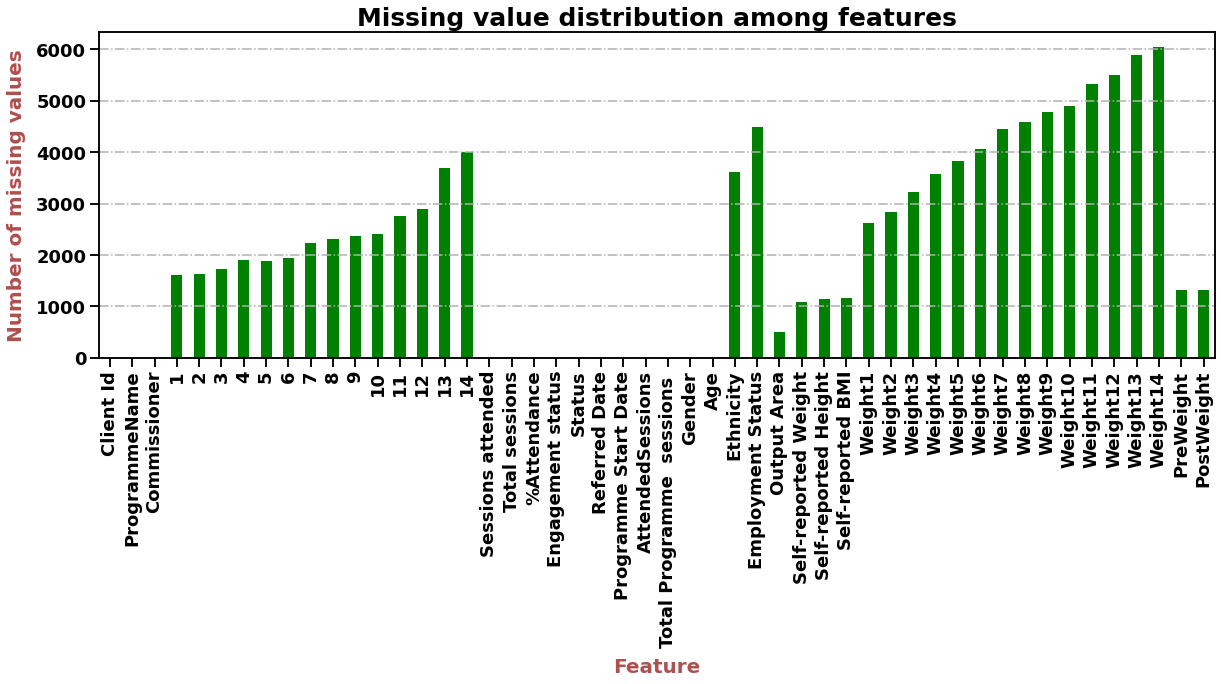

In [10]:
sns.set_context('talk')
plt.title('Missing value distribution among features', fontsize=25, weight = 'bold')
plt.xlabel('Feature', color='#AF5050', labelpad=10, fontsize=20, weight = 'bold') 
plt.ylabel('Number of missing values', color='#af5050', labelpad=10, fontsize=20, weight = 'bold')
plt.rcParams['axes.axisbelow'] = True
df_adult.isnull().sum().plot(figsize=(20, 6), color='green', rot=90,kind ='bar')
plt.xticks(fontsize=18, rotation=90,weight = 'bold')
plt.yticks(fontsize=18, weight = 'bold')
matplotlib.pyplot.grid(axis = 'y', linestyle='-.') 

## Observations: 
#### 1)The dataset has many missing values in the features as shown above.
#### 2)There are both categorical and numerical features
#### 3)There is a trend in the missing values of the features like weight measured every wek and the weekly attendence. They are increasing functions of week

## Finding the number of unique values for each feature of the dataset

In [11]:
print('Number of unique client ID\'s = ',df_adult['Client Id'].unique().shape[0],'\n')  
print("Total rows in the dataset =",df_adult.shape[0],'\n')
print("Number of unique programs = ", df_adult['ProgrammeName'].unique().shape[0], '\n' )
print('Number of unique commissioners =',df_adult["Commissioner"].unique().shape[0],'\n')
print("List of comissioner's = ", df_adult["Commissioner"].unique())

Number of unique client ID's =  7476 

Total rows in the dataset = 8029 

Number of unique programs =  642 

Number of unique commissioners = 22 

List of comissioner's =  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


#### 1) Number of unique clients (7476) < number of rows (8029).That means some clients might have attended more than 1 program.
#### 2) There are 642 unique programe sessions conducted accross different commissioneres and the programes are named as p1,p2,p3,....p642


#### The weekly attendance values have three distinct values 'Y', 'N' and nan (nan is not a number)

In [12]:
features = ['Sessions attended',"Total sessions",'Engagement status', 'Status','AttendedSessions','Gender','Age']
for feature in features:
    list1 = df_adult[feature].unique()  
    list1.sort()
    print("list of Unique values in the feature ",feature,' are ',list1,'\n')

print("list of Unique values in the feature 'Employment Status' are ",df_adult["Employment Status"].unique(),'\n')      
print("list of Unique values in the feature 'Ethnicity' are ",df_adult["Ethnicity"].unique())

list of Unique values in the feature  Sessions attended  are  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

list of Unique values in the feature  Total sessions  are  [12 13 14] 

list of Unique values in the feature  Engagement status  are  ['Completer' 'Dropout' 'NonInitiator'] 

list of Unique values in the feature  Status  are  ['Accepted'] 

list of Unique values in the feature  AttendedSessions  are  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

list of Unique values in the feature  Gender  are  ['F' 'M'] 

list of Unique values in the feature  Age  are  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87] 

list of Unique values in the feature 'Employment Status' are  [nan 'Retired' 'Other (please specify)' 'Unemployed'
 'Wage earner, part-time' 'Wage earner, full-time' 'Homemaker'
 'Student, part-time' 'Student, full

 #### 1) The feature  'sessions atteded' has values ranging from 0 to 14
 
 #### 2) The feature "Total sessions" has three values 12,13,14 
 
 #### 3) The participant engagement status is classified in to these three categories
 
 #### 4) That means all the applicants in the adult datasent are accepted for the programme. This feature 'Status' is not use full as it has a constant value for all rows. This column will be removed from the dataset.
 
 #### 5) This is a duplicate feature corresponding to the previous feature named "sessions atended". This feature will be removed
 
 #### 6) The gender is a binary
 
 #### 7) All the participants are aged in between 25-87. The age column has 69 distinct values
 
 #### 8) There are 9 categories in the feature employment status
 
 #### 9) The feature ethnicity has 6 distinct values

In [13]:
print("Unique values in referred date are ",df_adult["Referred Date"].unique().shape[0])   
print("min =",df_adult["Referred Date"].min())
print("max =",df_adult["Referred Date"].max())

Unique values in referred date are  1576
min = 2011-05-19 00:00:00
max = 2018-02-21 00:00:00


#### Paricipants are referred to the program in between the years 2011 and 2018. Note the feature refered date may not be usefull as it cant influence whether participants engagemant status is 'dropout' or 'competer'. It may be usefull to investigate if people refered in a particular month are more likely to be a non-initiator. For droupout prediction this feature is not considered.

In [14]:
print('max = ',np.nanmax(df_adult["Self-reported BMI"].unique()))
print('min = ',np.nanmin(df_adult["Self-reported BMI"].unique())) # the maximum and minimum BMI seems like outliers

max =  487654.34375
min =  0.330578505992889


#### The minimum and maximum values in the self-reported BMI are outliers. Other features like weights and heights are numerical and will have continious values. 

##  Renaming features
#### As weeky attendance columns are renamed as 'week1' instead of '1',  week2 instead of '2' and so on.
#### The spaces in the feature names are replaced with underscores

In [15]:
# renaming columns 1 to week1, 2 to week2.........14 to week14
df_adult=df_adult.rename(columns={1:'week1',2:'week2',3:'week3',4:'week4', 5:'week5'})
df_adult=df_adult.rename(columns={6:'week6',7:'week7',8:'week8',9:'week9', 10:'week10'})
df_adult=df_adult.rename(columns={11:'week11',12:'week12',13:'week13',14:'week14'})

#replacing spaces with underscores
df_adult.columns = df_adult.columns.str.replace(" ","_")
df_adult=df_adult.rename(columns={"Total_Programme__sessions_":"Total_Programme_sessions"})

### Replacing nulls in ethnicity and employment status by 'Not Known'

In [16]:
filt = df_adult['Ethnicity'].isnull()
df_adult.loc[filt,'Ethnicity'] = 'Not known'
filt = df_adult['Employment_Status'].isnull()
df_adult.loc[filt,'Employment_Status'] = 'Not known'

## Participant distribution among varitures features

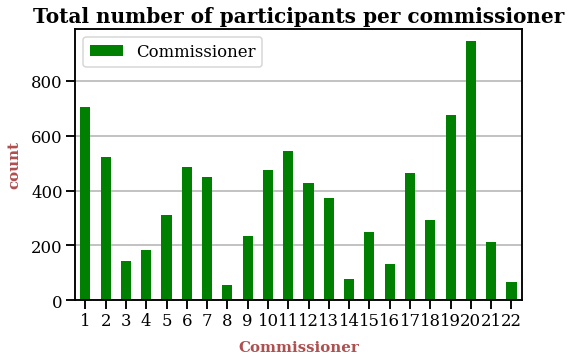

In [17]:
matplotlib.rcParams['font.family'] = "serif"
plt.rcParams['font.sans-serif'] = 'Helvetica'
#plt.grid('on')
sns.set_context('talk')
plt.title('Total number of participants per commissioner', fontsize=20, weight = 'bold')
plt.xlabel('Commissioner', color='#AF5050', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('count', color='#af5050', labelpad=10, fontsize=15, weight = 'bold')
###############################
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
df_adult['Commissioner'].value_counts().sort_index().plot(kind='bar',x='Commissioner',y ='count',figsize=(8, 5), legend=True, color='green', rot=0)
matplotlib.pyplot.grid(axis = 'y', linestyle='-') # b=None, linestyle='-', linewidth=3 , axis = 'both'

2018-01-23 00:00:00
2011-09-14 00:00:00


(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text major ticklabel objects>)

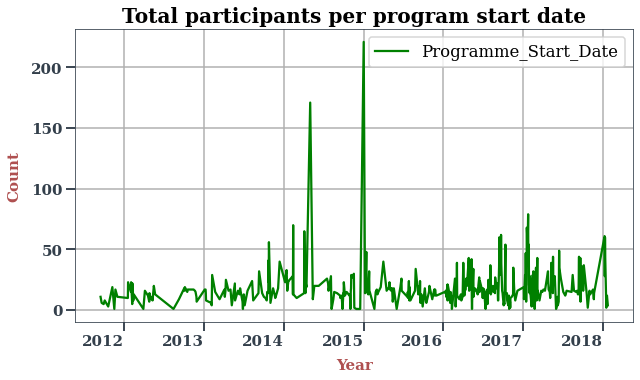

In [18]:
df_adult['Programme_Start_Date'].value_counts().sort_index().plot(figsize=(10, 6), legend=True, color='green', rot=0)
plt.legend(loc='upper right')

plt.title('Total participants per program start date', fontsize=20, weight = 'bold')
plt.xlabel('Year', color='#AF5050', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', color='#af5050', labelpad=10, fontsize=15, weight = 'bold')

print(df_adult['Programme_Start_Date'].max())
print(df_adult['Programme_Start_Date'].min())
matplotlib.pyplot.grid()
plt.xticks(fontsize=15,weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

#### year is not usefull to investigate participants outcomes as year doesnt repeat. month is exracted from the pogram start date to understand if a program started in a given month every year effect participant engagement outcomes.

## Deriving new features
#### 1) Adding month column
#### 2) Number of participants per group

In [19]:
#1 month
df_adult['month'] =  pd.DatetimeIndex(df_adult['Programme_Start_Date']).month

#2 adding number of participants per group in a program session 
df = df_adult[['ProgrammeName','Programme_Start_Date']]
grp = df.groupby(['ProgrammeName']).count()#.sort_values(['Programme_Start_Date'])
grp.reset_index(inplace = True)
grp = grp.rename(columns = {'Programme_Start_Date' : 'NumPerProgram'})
grp.head(2)
df_adult = pd.merge(df_adult, grp, how="left", on="ProgrammeName")

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

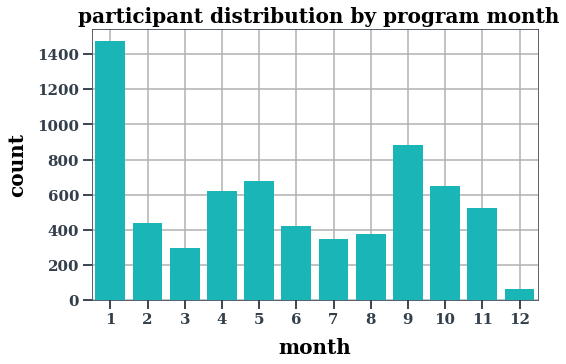

In [20]:
# participant distribution by program month
df =df_adult[~(df_adult['Engagement_status'] =='NonInitiator')]
plt.figure(figsize=(8,5))
plt.title(' participant distribution by program month', fontsize=20,weight = 'bold')
plt.xlabel("month", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=20, weight = 'bold')

ax = sns.countplot(x="month", data=df, color='darkturquoise')
matplotlib.pyplot.grid(axis = 'both', linestyle='-') 
plt.xticks(fontsize=15,weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

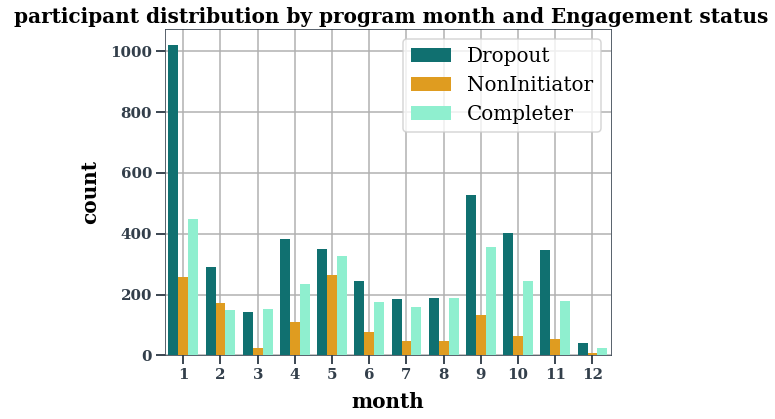

In [21]:
plt.figure(figsize=(8,6))
plt.title(' participant distribution by program month and Engagement status', fontsize=20,weight = 'bold')
plt.xlabel("month", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=20, weight = 'bold')
palette = ('teal','orange','aquamarine')
ax = sns.countplot(x="month", data=df_adult, palette=palette,hue='Engagement_status')
matplotlib.pyplot.grid(axis = 'both', linestyle='-') 
plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')
plt.legend(fontsize=20)

(array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75]),
 <a list of 11 Text major ticklabel objects>)

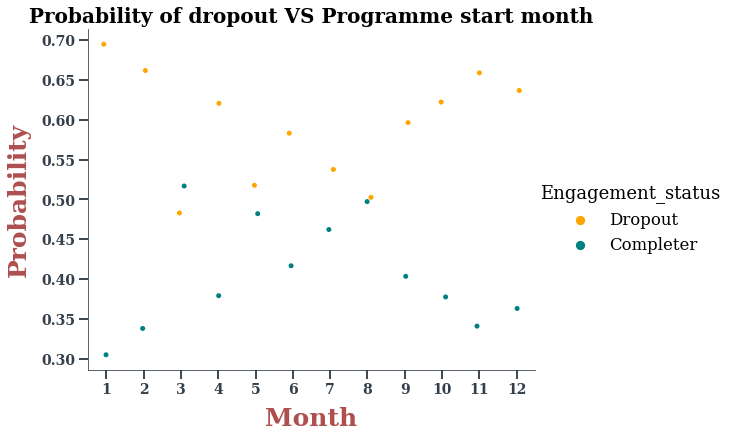

In [22]:
df = df_adult[['month','Engagement_status']]
df =df[~(df['Engagement_status'] =='NonInitiator')]

(df.groupby('month')['Engagement_status']        #group rows by month and for each month count the rows by engagement_status
.value_counts(normalize=True)                    # values_count ignores null rows
.rename('Probability')                           # renaming the column obtained by value_counts to probability
.reset_index()                                   # If the index has multiple levels, we can reset a subset of them:(remove index month)
.pipe((sns.catplot,'data'), x='month',y='Probability',hue='Engagement_status', height=6, aspect=8/6, palette=('orange','teal')))

plt.title('Probability of dropout VS Programme start month', fontsize=20, weight = 'bold')
plt.xlabel('Month', color='#AF5050', labelpad=10, fontsize=25, weight = 'bold') 
plt.ylabel('Probability', color='#af5050', labelpad=10, fontsize=25, weight = 'bold')
plt.xticks(fontsize=14, weight = 'bold')
plt.yticks(fontsize=14, weight = 'bold')

#### from the above plot if we exclude the probabilities in the month of march we see that participants dropout probability keeps decreasing with month until july where dropout probability becomes nearly 50% and the increases with month. This means programe which start in months of june, july and august have relatively less droupout rates compared to the programmes started in other months. 

In [23]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
sns.displot(df, x="NumPerProgram",color="y",element="step")
plt.title('Number of programs with a given group size', fontsize=15, weight = 'bold')
plt.xlabel("number of participants in the group", labelpad=10, fontsize=15, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

AttributeError: module 'seaborn' has no attribute 'displot'

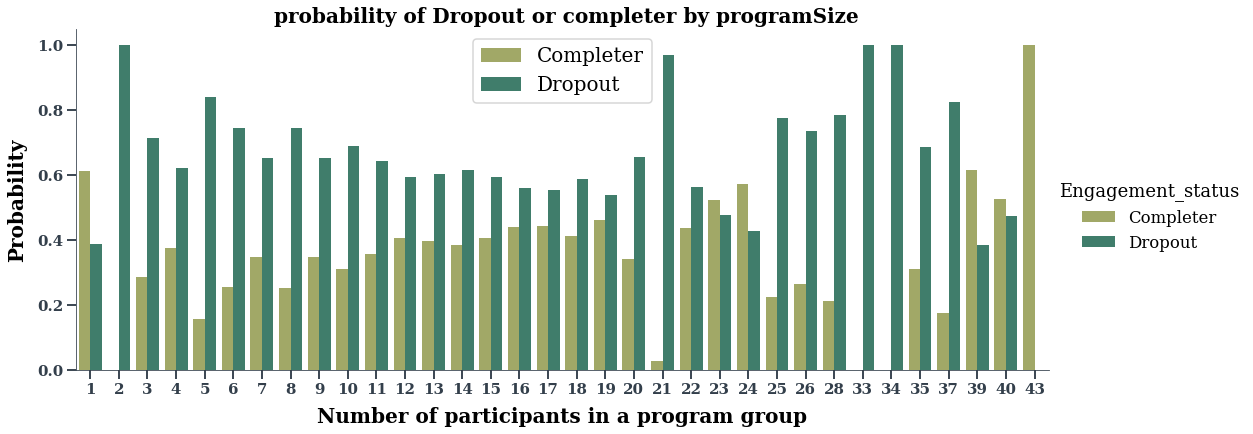

In [24]:
p = 'gist_earth_r'
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
group, column = 'NumPerProgram', 'Engagement_status'
grp_obj = df.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'),palette =p ,height=6, aspect=15/6, x=group, y='Probability',hue=column,kind='bar')

plt.title(' probability of Dropout or completer by programSize', fontsize=20, weight = 'bold')
plt.xlabel("Number of participants in a program group", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')
plt.legend(fontsize=20)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

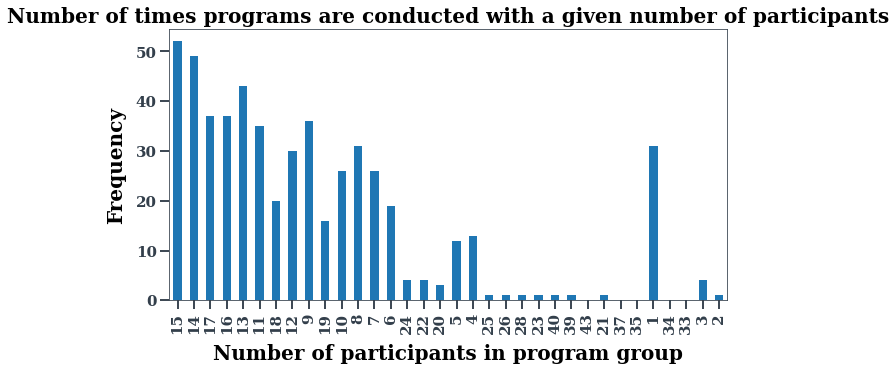

In [25]:
plt.figure(figsize=(10,5))
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]

series = df['NumPerProgram'].value_counts()
for i,v in series.items():
    series[i] = series[i]/i
series.plot(kind = 'bar')    

plt.title('Number of times programs are conducted with a given number of participants', fontsize=20, weight = 'bold')
plt.xlabel("Number of participants in program group", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Frequency", labelpad=10, fontsize=20, weight = 'bold')
plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

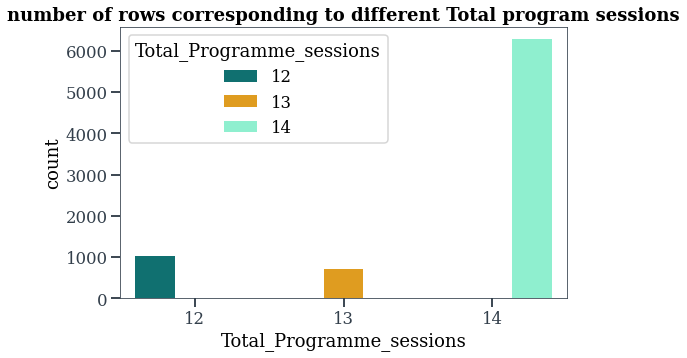

In [26]:
plt.figure(figsize=(8,5))
plt.title('number of rows corresponding to different Total program sessions', weight = 'bold')
sns.countplot(data=df_adult,palette = palette ,x='Total_Programme_sessions',hue = 'Total_Programme_sessions' ,order=df_adult.Total_Programme_sessions.value_counts().sort_index().index)

#### most participants have attended the programs that have 14 sessions in total

### Participant distribution based on their engagement outcomes

 #### Only one third of the total applicants have successfully completed the program rest of the two thirds are either dropout or non-initiators
#### Dropout% =  51.45099016066758 
#### Completer% =  32.91817162784905 
#### NonInitiator% =  15.630838211483372

(array([   0., 2000., 4000., 6000., 8000.]),
 <a list of 5 Text major ticklabel objects>)

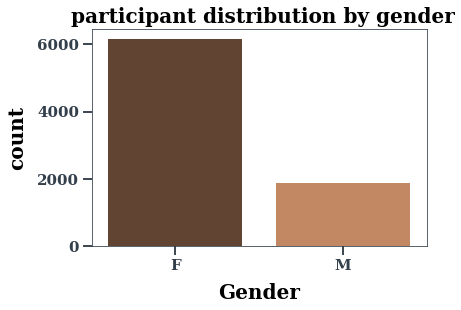

In [27]:
plt.figure(figsize=(6,4))
plt.title(' participant distribution by gender', fontsize=20, weight = 'bold')
plt.xlabel("Gender", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=20, weight = 'bold')
#plt.style.use('fivethirtyeight')
ax = sns.countplot(x="Gender", data=df_adult, palette="copper")
plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

#### Females clients are 3 times more than in number than males

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

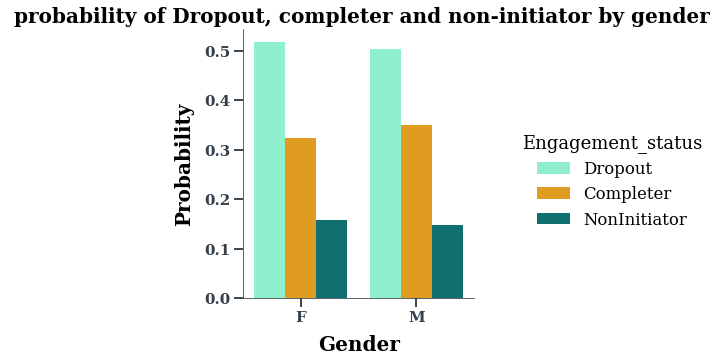

In [28]:
group, column = 'Gender', 'Engagement_status'
palette = ('aquamarine','orange','teal')  
grp_obj = df_adult.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'), x=group, y='Probability',hue=column,kind='bar', palette = palette)

plt.title(' probability of Dropout, completer and non-initiator by gender', fontsize=20, weight = 'bold' )
plt.xlabel("Gender", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

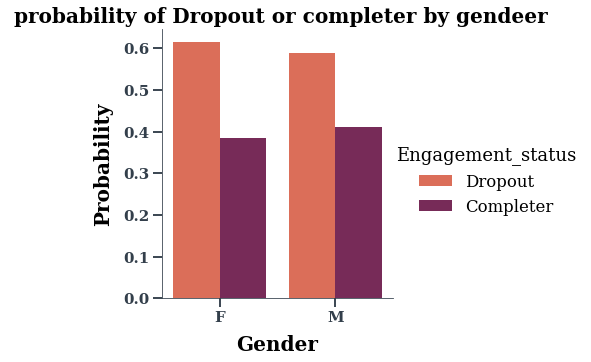

In [29]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
group, column = 'Gender', 'Engagement_status'
p='rocket_r'
grp_obj = df.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'), x=group, y='Probability',hue=column,kind='bar',palette=p)

plt.title(' probability of Dropout or completer by gendeer', fontsize=20, weight = 'bold')
plt.xlabel("Gender", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

#### Males have relatively more completion and low dropout probability compared to women though this difference is too small

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

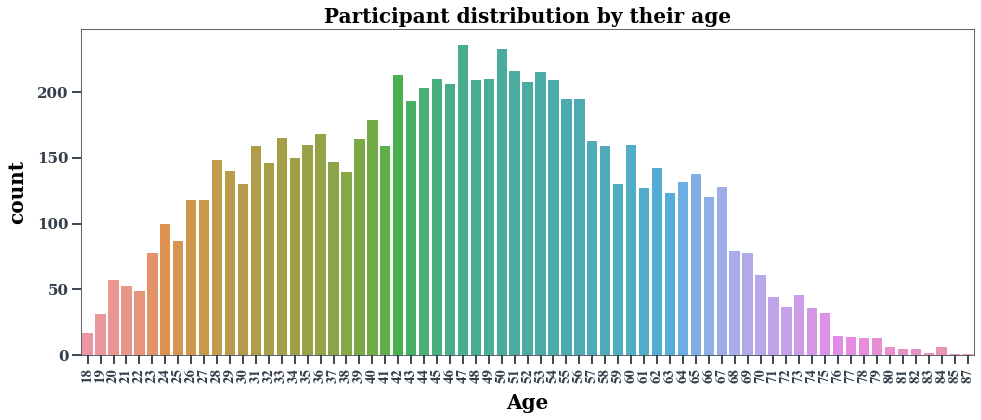

In [30]:
plt.figure(figsize=(16, 6))
plt.title('Participant distribution by their age', fontsize=20, weight = 'bold')
plt.xlabel("Age", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=20, weight = 'bold')
plt.xticks(fontsize=15, rotation=90,fontname = "Times New Roman",weight = 'bold')

sns.countplot(data=df_adult, x='Age', order=df_adult.Age.value_counts().sort_index().index)
plt.yticks(fontsize=15, weight = 'bold')

## Participant engagement status by age

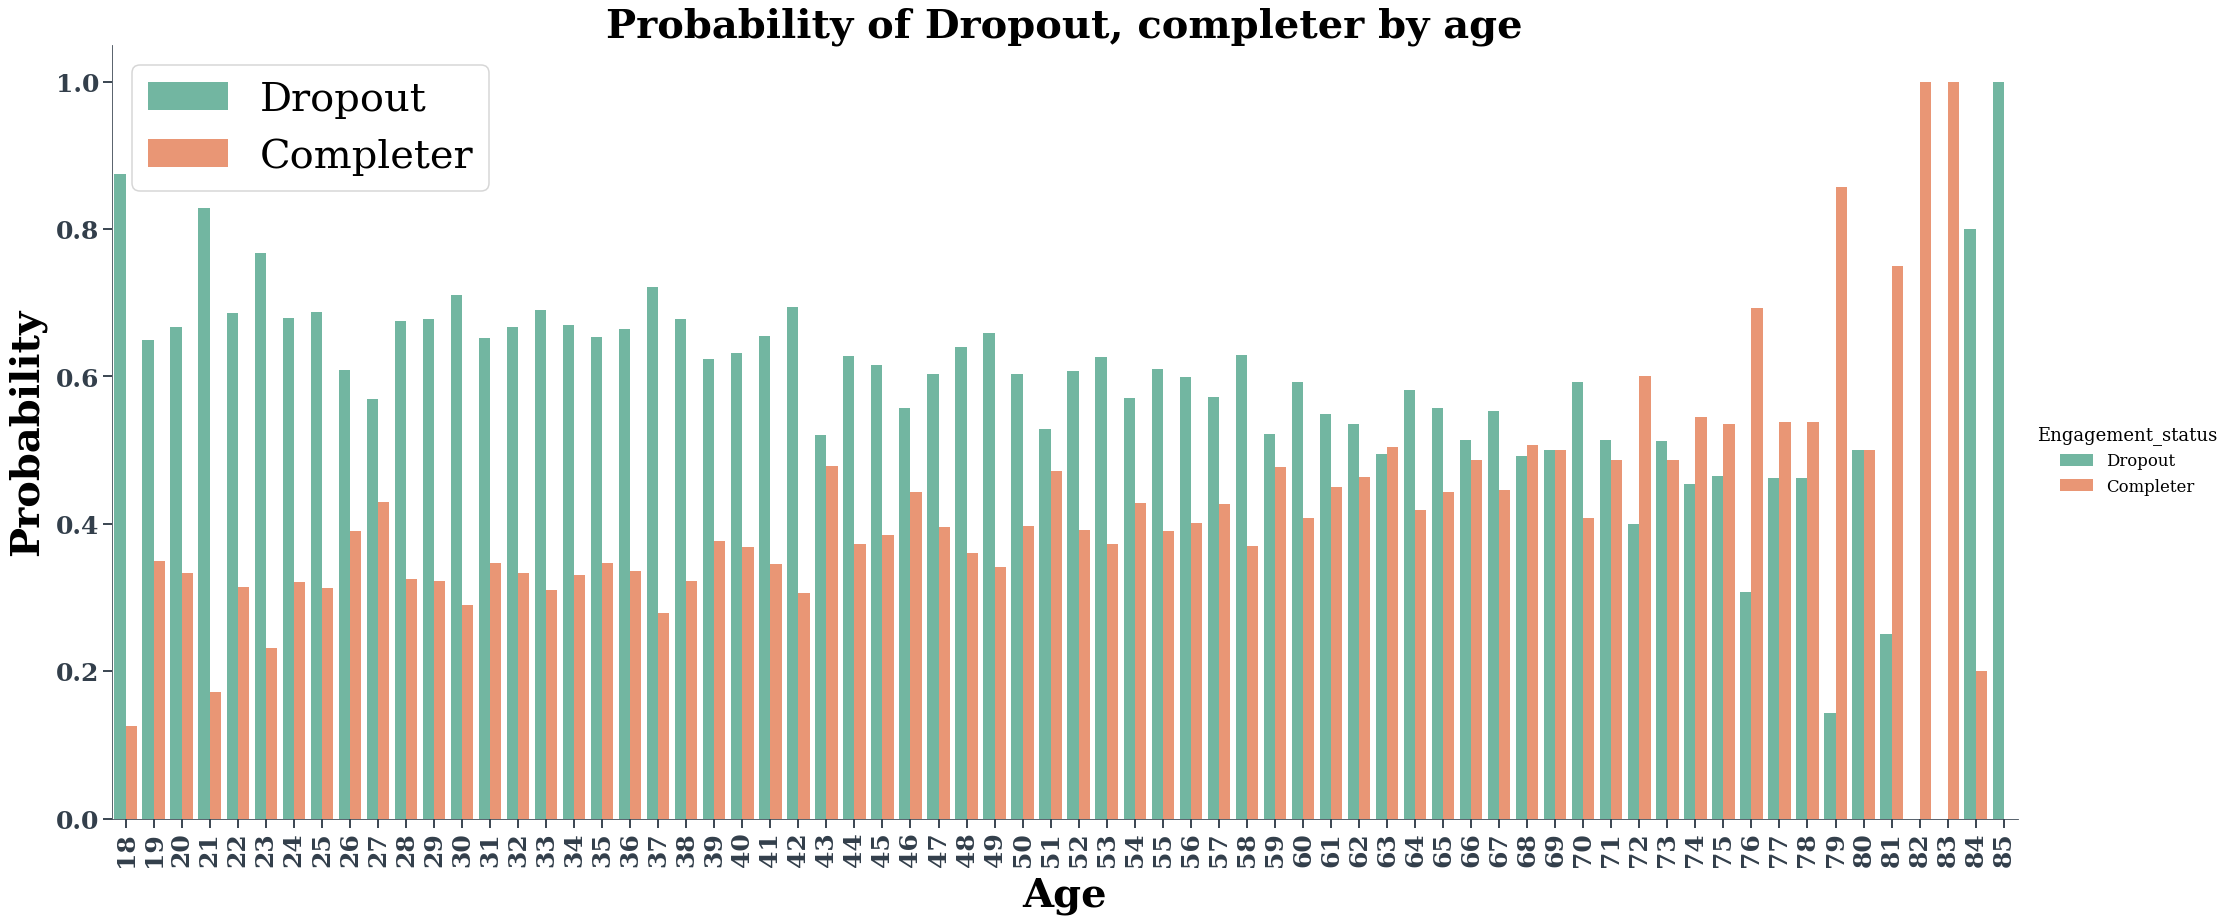

In [31]:
group, column = 'Age', 'Engagement_status'
grp_obj = df.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'), x=group, y='Probability',hue=column,palette="Set2",kind='bar',height=12, aspect=28/12)

plt.title('Probability of Dropout, completer by age', fontsize=40, weight = 'bold')
plt.xlabel("Age", labelpad=10, fontsize=40, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=40, weight = 'bold')
plt.xticks(fontsize=25, rotation=90,weight = 'bold')
plt.yticks(fontsize=25, weight = 'bold')
plt.legend(fontsize=40)

#### From the above bar plot we see that the probability of droupout is high for lower ages and low for higher age group and with a boundary transition age in range from 68 to 72 ages where the dropout and success probability become same. The dropout probability then decrease with age if we exclude upper outliers in age i.e if age < 84

## Engagement status by ethnicity

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

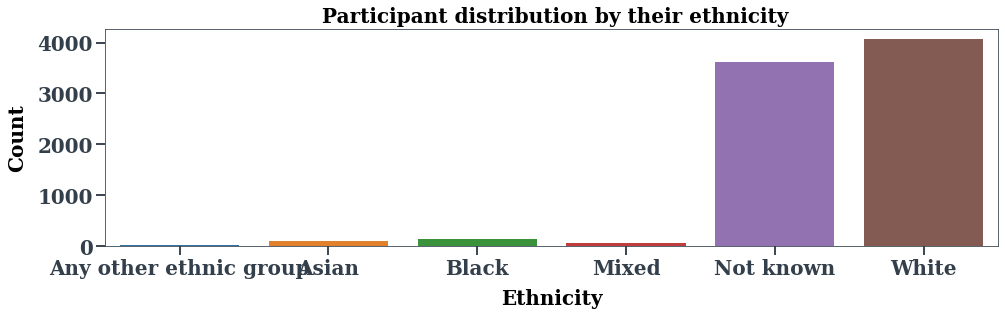

In [32]:
plt.figure(figsize=(16, 4))
plt.title(' Participant distribution by their ethnicity', fontsize=20, weight = 'bold')
sns.countplot(data=df_adult, x='Ethnicity', order=df_adult.Ethnicity.value_counts().sort_index().index)

plt.xlabel("Ethnicity", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Count", labelpad=10, fontsize=20, weight = 'bold')
plt.xticks(fontsize=20,weight = 'bold')
plt.yticks(fontsize=20, weight = 'bold')

#### From the above bar plot we see that there is disproportionately large population in the ethnicity columns. Data distribution among other ethnicity groups is very sparce. The learning models may not pick the trends in the engagement status of non-white clients. 

Text(55.36659056712965, 0.5, 'Probability')

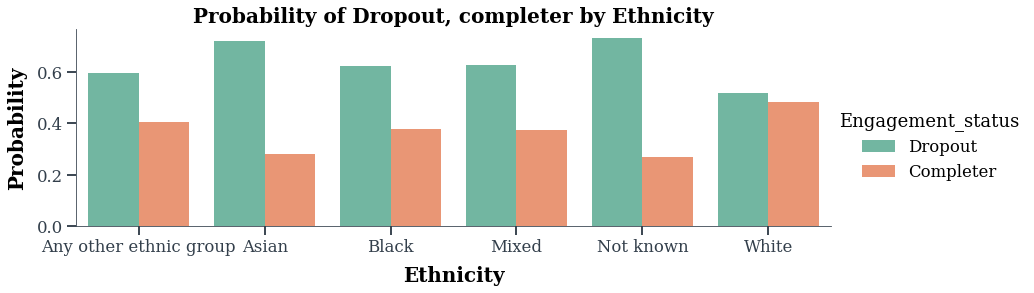

In [33]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
group, column = 'Ethnicity', 'Engagement_status'
grp_obj = df.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'), x=group, y='Probability',palette="Set2",hue=column,kind='bar',height=4, aspect=12/4)

plt.title('Probability of Dropout, completer by Ethnicity', fontsize=20, weight = 'bold')
plt.xlabel("Ethnicity", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

#### Asian ethnic groups are more probable to drop out and white ethnic group is relatively less probable to droupout from the program. 

## Participant distribution by Employment Status

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

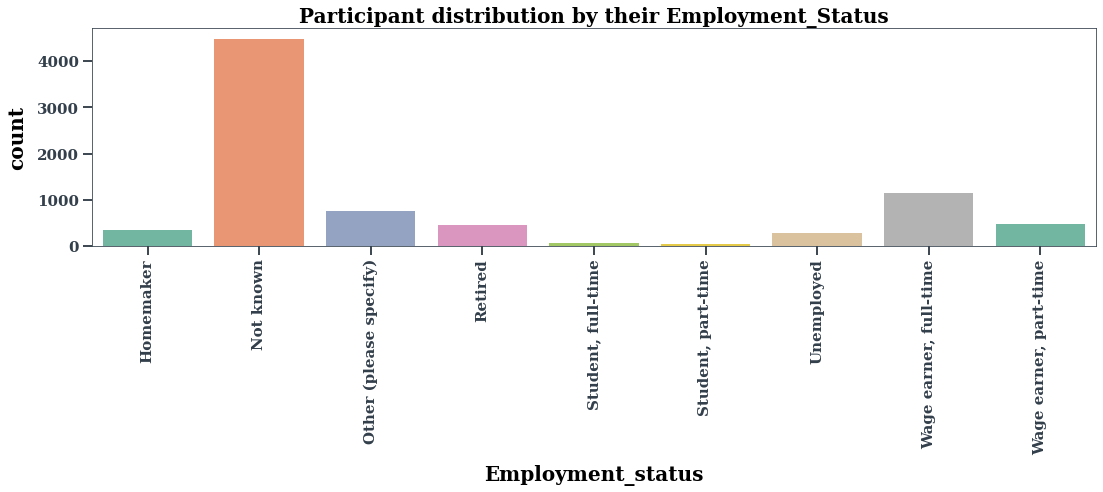

In [34]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_adult, x='Employment_Status',palette="Set2" ,order=df_adult.Employment_Status.value_counts().sort_index().index)

plt.title('Participant distribution by their Employment_Status', fontsize=20, weight = 'bold')
plt.xlabel("Employment_status", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("count", labelpad=10, fontsize=20, weight = 'bold')
plt.xticks(fontsize=15, rotation=90, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

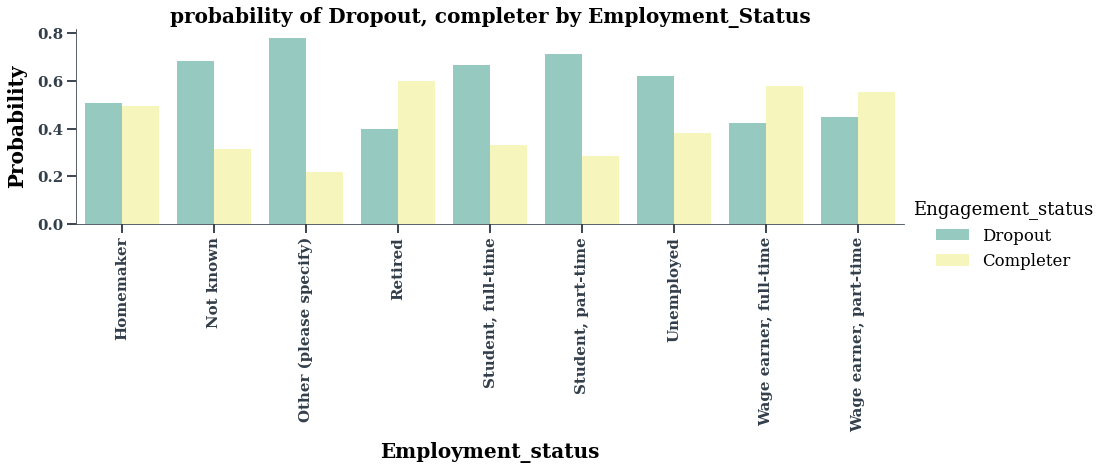

In [35]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
group, column = 'Employment_Status', 'Engagement_status'

grp_obj = df.groupby(group)[column]
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'),palette="Set3" ,x=group, y='Probability',hue=column,kind='bar',height=4, aspect=13/4)

plt.title('probability of Dropout, completer by Employment_Status', fontsize=20, weight = 'bold')
plt.xlabel("Employment_status", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')
plt.xticks(fontsize=15, rotation=90,weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

### Students in both part-time and full time category have high dropout probability compared to retiered and wage workers while home makers are 50% proboble to dropout

In [36]:
s = sns.displot(df_adult, x="Commissioner", hue="Engagement_status", multiple="dodge",height=5, aspect=15/5)
#plt.xticks(range(1,23))
plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

AttributeError: module 'seaborn' has no attribute 'displot'

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

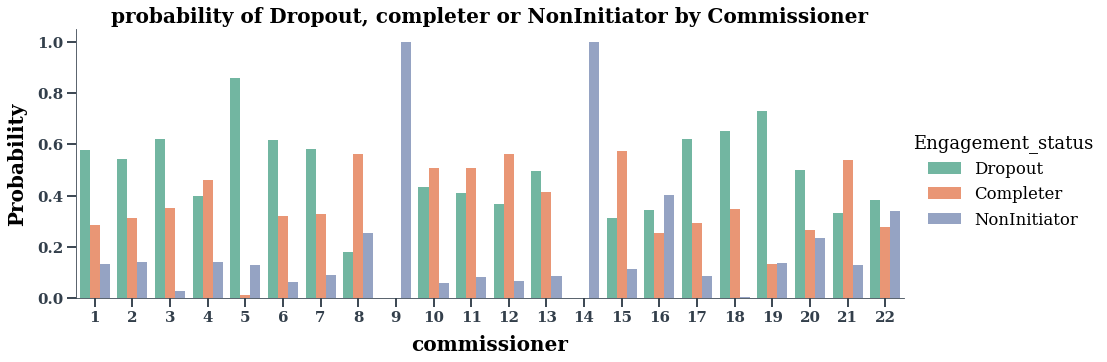

In [37]:
df =df_adult
group, column = 'Commissioner', 'Engagement_status'
grp_obj = df.groupby(group)[column]                                                                       
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'),palette="Set2"  ,x=group, y='Probability',hue=column,kind='bar',height=5, aspect=13/5)

plt.title('probability of Dropout, completer or NonInitiator by Commissioner', fontsize=20, weight = 'bold')
plt.xlabel("commissioner", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

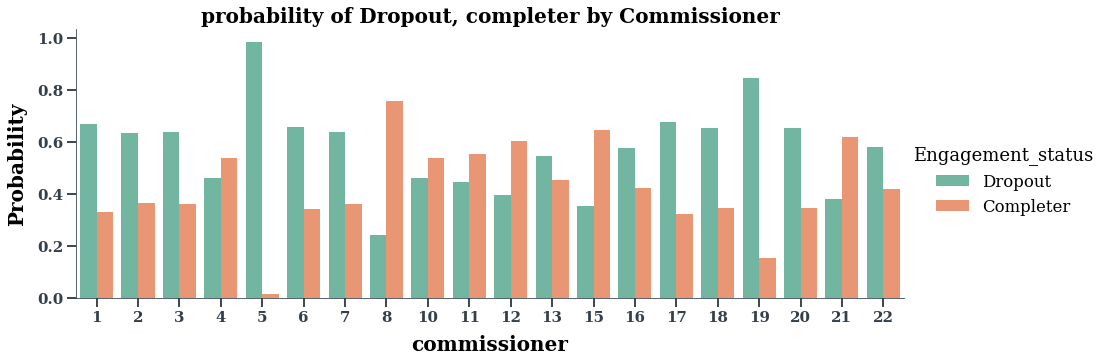

In [38]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]

group, column = 'Commissioner', 'Engagement_status'
grp_obj = df.groupby(group)[column]                                                                       
grp_obj.value_counts(normalize=True).rename('Probability').reset_index().pipe((sns.catplot,'data'),palette="Set2"  ,x=group, y='Probability',hue=column,kind='bar',height=5, aspect=13/5)

plt.title('probability of Dropout, completer by Commissioner', fontsize=20, weight = 'bold')
plt.xlabel("commissioner", labelpad=10, fontsize=20, weight = 'bold')
plt.ylabel("Probability", labelpad=10, fontsize=20, weight = 'bold')

plt.xticks(fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')

##### commissioner is related to the participant engagement status from the above plot. some commissioners have very high NonInitiators and some have less droupout

# Data Preparation
## Percentage of missing values

In [39]:
num_missing = df_adult.isnull().sum().sum()   #df_adult.isnull().sum() gives num of missing val column wise another .sum() gives total missing values
num_cells = np.product(df_adult.shape)         # total number of 
print('percentage of missing data = ',num_missing*100/num_cells,'%')
n_missing = num_missing*100/num_cells

percentage of missing data =  24.32001302969045 %


### Percentage of missing values per column

In [40]:
print('\n Percent of missing values per column \n')
for column in df_adult:
    num_missing = df_adult[column].isnull().sum()
    num_rows = df_adult.shape[0]
    if num_missing > 0:
        print(column,'=',(num_missing/num_rows)*100)


 Percent of missing values per column 

week1 = 20.077220077220076
week2 = 20.23913314235895
week3 = 21.497073109976338
week4 = 23.726491468426953
week5 = 23.37775563582015
week6 = 24.286959770830737
week7 = 27.8864117573795
week8 = 28.733341636567445
week9 = 29.40590359945199
week10 = 29.953917050691242
week11 = 34.387844065263415
week12 = 36.00697471665214
week13 = 45.970855648275005
week14 = 49.93149831859509
Referred_Date = 0.11209366048075727
Output_Area = 6.23988043342882
Self-reported_Weight = 13.575787769336156
Self-reported_Height = 14.186075476398058
Self-reported_BMI = 14.497446755511273
Weight1 = 32.56943579524225
Weight2 = 35.30950305143853
Weight3 = 40.3038983684145
Weight4 = 44.638186573670446
Weight5 = 47.801718769460706
Weight6 = 50.51687632332794
Weight7 = 55.3369037240005
Weight8 = 57.06812803586997
Weight9 = 59.55909826877569
Weight10 = 60.97895130153195
Weight11 = 66.33453730227924
Weight12 = 68.4518620002491
Weight13 = 73.48362187071864
Weight14 = 75.289575289575

### Identifying the clients that attended multiple sessions 

In [41]:
c=[]
repeating_clients=[]                     # collecting all repeated Client_Id's into list c
Client_Id=df_adult['Client_Id']
for i, r in df_adult.iterrows():
    if(r['Client_Id'] in c and r['Client_Id'] not in repeating_clients):
        repeating_clients.append(r['Client_Id'])
    else:
        c.append(r['Client_Id'])

### defining a functin to fill a null value of a feature in a row corresponding to a client with the value of the feature from other row of the same client_ID 

In [42]:
def fillnull(column):
    for c_id in repeating_clients:          # for a given client with client_id = c_id and c_id is repeating
        filt = (~df_adult[column].isnull()) & (df_adult["Client_Id"]==c_id) #filter rows with ethnicity notnull and for client_id = c_id
        data = df_adult[filt][column] # series with ethnicity in rows not null for a client with client_id = c_id
        data_2 = df_adult[filt][[column,'Referred_Date']]
        if(data.unique().shape[0] == 1): # to make sure that ethnicity series has only 1 unique value(one row) which replaces nulls in other rows
            fillby = data.iloc[0]   # as only there is one row in data_select
            df_adult.loc[df_adult['Client_Id'] == c_id, [column]]  = fillby # gives a warning but works 
        elif(data.unique().shape[0] > 1):  # if many values of ethnicity for the same client
            #print(data_2,'\n')   # df with ethnicity in rows not null for a client with client_id = c_id
            data_2 = data_2[data_2['Referred_Date']==max(data_2['Referred_Date'])] 
            fillby = data_2[column].iloc[0]        # using the latest recorded value for ethnicity
            #print("fill nulls by = ",fillby )
            df_adult.loc[(df_adult['Client_Id'] == c_id) & (df_adult[column].isnull()) , [column]]  = fillby # this will allow to select the value that can be used replace nulls. I am filling nulls by the value at most recent refered date
            #print('\n')

In [43]:
fillnull(column='Ethnicity') # This reduced null values in ethnicity by 3.7%
# can be done for location and employement status as well if they doesnt change, i.e without the elif condition or can be replaced with the value at nearest reported date

#### add new feature value called 'unknown' for missing values in employment and Ethnicity values rather than deleting for now
#### This also has an effect on the accuracies of the classification algorithms

## Remove unwanted columns and and remove outliers

#### 1) The column status has a constant value 'Accepted' for all its rows. This column has no variability and hence doesnt influence any inferences that can be obtained from the data. hence this column is dropped from the table

#### 2) The fatures 'Total_sessions' and 'Sessions_attended' are duplicate of 'total programme sessions' and 'attend_sessions'

In [44]:
# making a list of columns that are to be removed
remove_column = []   
remove_column.append('Status')
remove_column.extend(['Total_sessions','Sessions_attended'])

### Outliers

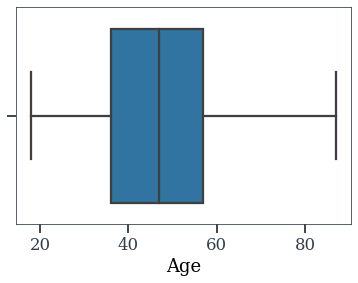

In [45]:
Age=df_adult[['Age']]
sns.boxplot(x=Age['Age'])

#### There are no outliers in age

In [46]:
print(df_adult.iloc[20][['Weight1','PreWeight']] )
df_adult[['Weight1','PreWeight']].head(10)

Weight1        NaN
PreWeight    124.7
Name: 20, dtype: object


,Weight1,PreWeight
0,106.599998,106.599998
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,151.500000,151.500000
5,98.400002,98.400002
6,101.300003,101.300003
7,189.600006,189.600006
8,92.400002,92.400002
9,133.000000,133.000000


#### From the above table we see that 'weight1' and "preWeight" are exactly same and the missing values in one of them can be substituted with the other
#### filling nulls in weight1 with preweight values and viceversa

In [47]:
column1 = 'Weight1'
column2 = 'PreWeight'
for i,r in df_adult[[column1,column2]].iterrows():
    if(pd.isna(df_adult.loc[i,column1])):
        df_adult.loc[i,column1] = r[column2]
    elif(pd.isna(df_adult.loc[i,column2])):
         df_adult.loc[i,column2] = r[column1]

### Outliers in Weight1 column

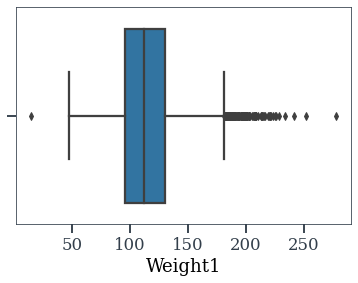

In [48]:
Weight1=df_adult[['Weight1','PreWeight']]
sns.boxplot(x=Weight1['Weight1'])

In [49]:
mean_weight = df_adult['Weight1'].mean()
std_weight = df_adult['Weight1'].std()
filt = ((df_adult['Weight1'] - mean_weight) / std_weight).abs() > 3
df_adult[filt][['Weight1','PreWeight']].shape[0]

63

#### There are 63 outliers in weight based on their distance from mean greater than 3 times the standard deviation

### droping outliers in Weight1

In [50]:
def dropoutliers(column,df):
    mean_value = df[column].mean()
    std_dev = df[column].std()
    filt = ~(((df[column] - mean_value) / std_dev).abs() > 3)
    df =  df[filt]
    return df

# droping outliers in Weight1
print(df_adult.shape[0])
df_adult = dropoutliers(column="Weight1",df =df_adult) 
print(df_adult.shape[0])

8029
7966


### Outliers in self reported height

In [51]:
print(df_adult.shape[0])
df_adult = dropoutliers(column="Self-reported_Height",df =df_adult)
print(df_adult.shape[0])

7966
7952


In [52]:
df = df_adult[['PreWeight','Self-reported_Weight','Weight1']]
df = df.dropna()
df['(Self-reported_Weight - Weight1)'] = (df['Weight1'] - df['Self-reported_Weight']).abs()

mean_val =(df['Weight1'] - df['Self-reported_Weight']).abs().sum()
print('average difference between the preweight(Weight1) and self-reported weights is',mean_val/df.shape[0],'lb ')

average difference between the preweight(Weight1) and self-reported weights is 3.471460931046009 lb 


#### Self reported weight and preweight differ by 3.5 lb. self reported weights are generally unreliable so we will take only measured weights.   (  https://pubmed.ncbi.nlm.nih.gov/2239790/    )
#### 1)we can delete the column self_reported weight and use preweight or weight1 instead
#### 2) As preweight is same as weight1 preweight feature is dropped
#### 3)The column bmi is obtained from weight and height columns and hence is corelated and will be deleted

In [53]:
remove_column.append('Self-reported_Weight')
remove_column.append('Self-reported_BMI')
remove_column.append('PreWeight')
remove_column.append('Referred_Date')

In [54]:
print('\n Percent of missing values per column > 30% \n')
for column in df_adult:
    num_missing = df_adult[column].isnull().sum()
    num_rows = df_adult.shape[0]
    if((num_missing/num_rows)*100 > 30):
        print(column,'=',(num_missing/num_rows)*100)


 Percent of missing values per column > 30% 

week10 = 30.1056338028169
week11 = 34.595070422535215
week12 = 36.21730382293762
week13 = 46.17706237424547
week14 = 50.13832997987927
Weight2 = 35.29929577464789
Weight3 = 40.3672032193159
Weight4 = 44.71830985915493
Weight5 = 47.86217303822938
Weight6 = 50.5407444668008
Weight7 = 55.47032193158954
Weight8 = 57.20573440643864
Weight9 = 59.73340040241448
Weight10 = 61.116700201207244
Weight11 = 66.53672032193158
Weight12 = 68.59909456740442
Weight13 = 73.66700201207243
Weight14 = 75.42756539235413


##### looking at the attendance percent column we seen that the attencence percentage values are calculated by considering missing values in weekly attendance as absence. Infact attandence% cant be calculated with out errors due to missing values. Hence attendance column can be removed . we may fill null values of weekly attendences as absent for dropouts starting from week 14 to week1

In [55]:
remove_column.extend(['%Attendance'])
remove_column

['Status',
 'Total_sessions',
 'Sessions_attended',
 'Self-reported_Weight',
 'Self-reported_BMI',
 'PreWeight',
 'Referred_Date',
 '%Attendance']

### removing unwanted columns from the list

In [56]:
for column in remove_column:
    df_adult.drop(column, axis=1, inplace=True)

In [57]:
df_adult.shape

(7952, 44)

### Derived features
#### 1) weight change after first week

#### 2) weight change after second week

In [58]:
# adding weightloss after first week dw21 
df_adult['dw21'] = df_adult['Weight1'] - df_adult['Weight2']  # weight loss after first week
# adding weightloss after second week dw32
df_adult['dw31'] = df_adult['Weight1'] - df_adult['Weight3']  # weight loss after second week
# Total weight loss after the program
df_adult['weight_loss'] = df_adult['Weight1'] - df_adult['PostWeight']

In [59]:
df_adult[['Weight1','Weight2','dw21','dw31']].describe()

,Weight1,Weight2,dw21,dw31
count,6632.000000,5145.000000,5145.000000,4742.000000
mean,113.191024,113.899464,0.497345,0.850375
std,25.586810,28.893478,14.556505,13.775779
min,47.400002,26.900000,-1000.000023,-921.599998
25%,95.500000,96.599998,0.000000,0.000000
50%,111.699997,112.300003,0.300003,0.900002
75%,129.399994,129.500000,1.199997,2.000000
max,194.800003,1108.900024,119.400005,111.700000


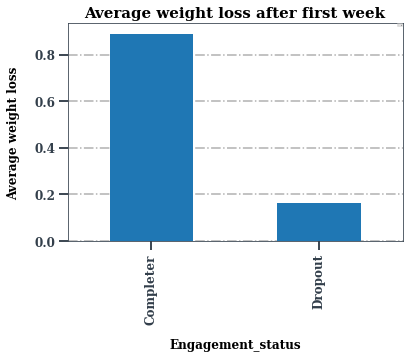

In [60]:
df = df_adult[~(df_adult['Engagement_status'] == 'NonInitiator')]
df = df[['dw21','Engagement_status']]
df = df.dropna()

df.groupby('Engagement_status').mean().plot(kind = 'bar')
plt.title('Average weight loss after first week', fontsize=15, weight = 'bold')

plt.rcParams['axes.axisbelow'] = True
plt.xlabel("Engagement_status", labelpad=14, fontsize=12, weight = 'bold')
plt.ylabel("Average weight loss", labelpad=14, fontsize=12, weight = 'bold')
plt.xticks(fontsize=12,weight = 'bold')
plt.yticks(fontsize=12, weight = 'bold')
plt.legend("weightloss",fontsize=0)
matplotlib.pyplot.grid(axis = 'y', linestyle='-.') # b=None, linestyle='-', linewidth=3

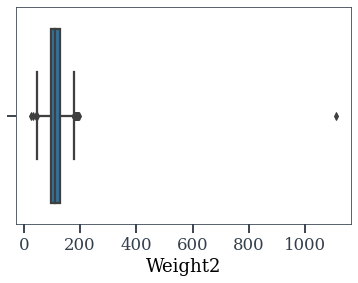

In [61]:
# outliers in weight2
Weight2=df_adult[['Weight2']]
sns.boxplot(x=Weight2['Weight2'])

### Removing outliers in weight2

In [62]:
df = df_adult[['Weight1','Weight2','Weight3','Engagement_status']]

In [63]:
print(df.shape[0])
df = dropoutliers(column="Weight2",df =df) 
print(df.shape[0])

df['dw31'] = df['Weight1'] - df['Weight3']  # weight loss after second week

7952
7950


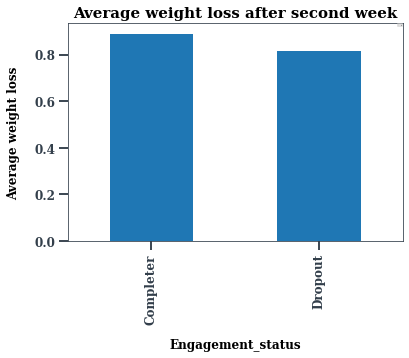

In [64]:
df = df[~(df['Engagement_status'] == 'NonInitiator')]
df = df[['dw31','Engagement_status']]
df = df.dropna()

df.groupby('Engagement_status').mean().plot(kind = 'bar')
plt.title('Average weight loss after second week', fontsize=15, weight = 'bold')

plt.xlabel("Engagement_status", labelpad=14, fontsize=12, weight = 'bold')
plt.ylabel("Average weight loss", labelpad=14, fontsize=12, weight = 'bold')
plt.xticks(fontsize=12,weight = 'bold')
plt.yticks(fontsize=12, weight = 'bold')
plt.legend("weightloss",fontsize=0)

#### df_adult is the data frame after pliminary cleaning. Outliers are removed and few missing values are filled, unwanted and duplicate columns are removed. It has 7917 rows.
### Saving cleaned data to disk

In [65]:
df_adult.shape

(7952, 47)

#### Droping non initiators
#### saving the cleaned dataset to disk

In [66]:
filt = ~(df_adult['Engagement_status'] == 'NonInitiator')
df = df_adult[filt]
df = df.dropna(axis = 'index', how = 'any', subset = ['Gender','Age','Ethnicity','Employment_Status'])
print(df.shape)
df.to_csv('data.csv')
### df will not have null values for all the above categorical variables 

(6698, 47)


#                                         MachineLearning Models

## Logistic Regression

In [67]:
def runLogREG(df,columns,cat,num,split_ratio,cmap):
    df = df                           # dataFrame
    columns = columns                 # features
    df = df[columns]          
    df = df[columns].dropna()
    print('\n shape of the dataset is',df.shape)
    print("\n Data distribution \n")
    print(df['Engagement_status'].value_counts())
    print("\n features included")
    catageorical_variables = cat      # categorical features 
    numerical_variables =  num        # numerical features
    split_ratio = split_ratio         # test train split ratio
    cmap = cmap                       # color of confusion matrix
    print(catageorical_variables)
    print(numerical_variables)
    X = df.drop(['Engagement_status'],axis=1).astype(str)     #features
    y = df['Engagement_status']                               #label
    # spliting data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=0)
    #Transforming categorical features to numerical values using oneHotEncoder and sacling numerical features
    transform_cat = OneHotEncoder(handle_unknown='ignore')
    transform_num = MinMaxScaler()
    #Logistic Regression
    model_lr = LogisticRegression(max_iter=5000)
    preprocess_lr =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
    pipe_lr = Pipeline(steps = [('preprocess',preprocess_lr),('LogisticClassifier',model_lr)])
    #Searching for best parameters
    param_grid = {
        'LogisticClassifier__penalty': [ 'l1','l2'],
        'LogisticClassifier__C': [ 10000,5000 ,1000,500,100,10,1,0.1],
        'LogisticClassifier__solver' : ['newton-cg', 'lbfgs', 'liblinear']
         }
    cv = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
    model_lr = LogisticRegression(max_iter=5000)
    search = GridSearchCV(pipe_lr, param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    search.fit(X_train, y_train)
    bestParams = search.best_params_
    print('\n',"Logistic Regression parameters: \n",bestParams)
    c = bestParams["LogisticClassifier__C"]
    p = bestParams["LogisticClassifier__penalty"]
    s = bestParams["LogisticClassifier__solver"]
    finaleModel = LogisticRegression(max_iter=5000, C= c, penalty = p, solver = s)
    pipe_lr = Pipeline(steps = [('preprocess',preprocess_lr),('LogisticClassifier',finaleModel)])
    pipe_lr.fit(X_train, y_train)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring='accuracy')
    print('\n','Cross-Val Accuracy_train = %.2f' % scores.mean())
    #Model Evaluation on test data
    print("\n Cross-Val Accuracy_test: %.2f" % pipe_lr.score(X_test, y_test))
    print('\n')
    #Confusion Matrix Testing evaluation
    y_pred = pipe_lr.predict(X_test)
    print(metrics.classification_report(y_test,y_pred),'\n')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = cmap)
    #ROC-Curve and AUC value# test
    print('\n')
    metrics.plot_roc_curve(pipe_lr, X_test, y_test)  
    matplotlib.pyplot.grid(axis = 'y', linestyle='-')
    plt.show()
    #Permutation feature Importance
    result = permutation_importance(pipe_lr, X, y, n_repeats=5000,random_state=0)
    # plot feature importance
    imp = importances(pipe_lr, X_test, y_test) # permutation
    fi = plot_importances(imp)
    return fi


 shape of the dataset is (4501, 12)

 Data distribution 

Dropout      2331
Completer    2170
Name: Engagement_status, dtype: int64

 features included
['Commissioner', 'Gender', 'Ethnicity', 'Employment_Status', 'month']
['Age', 'Weight1', 'dw21', 'NumPerProgram', 'Self-reported_Height', 'Total_Programme_sessions']

 Logistic Regression parameters: 
 {'LogisticClassifier__C': 10000, 'LogisticClassifier__penalty': 'l2', 'LogisticClassifier__solver': 'newton-cg'}

 Cross-Val Accuracy_train = 0.64

 Cross-Val Accuracy_test: 0.62


              precision    recall  f1-score   support

   Completer       0.59      0.62      0.61       429
     Dropout       0.64      0.61      0.63       472

    accuracy                           0.62       901
   macro avg       0.62      0.62      0.62       901
weighted avg       0.62      0.62      0.62       901
 





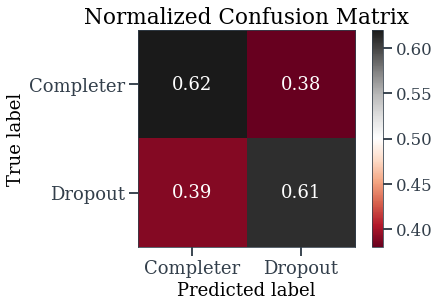

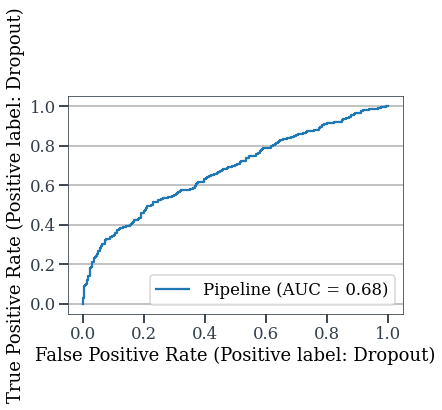

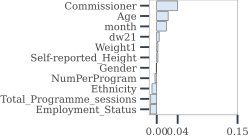

In [68]:
df = pd.read_csv('data.csv')  
df =df.drop(axis = 1,columns = 'Unnamed: 0')
columns = ['Commissioner','Weight1','Self-reported_Height','Gender','Age','Ethnicity','Employment_Status','Engagement_status','month','dw21','NumPerProgram','Total_Programme_sessions']
cat = ['Commissioner', 'Gender', 'Ethnicity', 'Employment_Status', 'month']
num = ['Age','Weight1','dw21','NumPerProgram','Self-reported_Height','Total_Programme_sessions']

fi = runLogREG(df,columns,cat,num,split_ratio = 0.2,cmap = 'RdGy')
fi

#### Gender, ethnicity and initial weight are poor predictors of classification

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [70]:
df = pd.read_csv('data.csv')  
df =df.drop(axis = 1,columns = 'Unnamed: 0')
columns = ['Commissioner','Weight1','Self-reported_Height','Gender','Age','Ethnicity','Employment_Status','Engagement_status','month','dw21','NumPerProgram','Total_Programme_sessions']
df = df[columns]
df = df[columns].dropna()

X = df.drop(['Engagement_status'],axis=1).astype(str)     #features
y = df['Engagement_status']                               #label

catageorical_variables = ['Commissioner', 'Gender', 'Ethnicity', 'Employment_Status', 'month']
numerical_variables =  ['Age','Weight1','dw21','NumPerProgram','Self-reported_Height','Total_Programme_sessions']

In [71]:
split_ratio = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=0)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
transform_num = MinMaxScaler()
splitting_criteria = 'gini'
num_trees = 1000

In [72]:
# ordinal Encoding
transform_cat = OrdinalEncoder()
model_rf = RandomForestClassifier(n_estimators = num_trees, criterion = splitting_criteria)
preprocess_rf =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
pipe_rf = Pipeline(steps = [('preprocess',preprocess_rf),('RandomForest',model_rf)])
scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy')
print('Accuracy =',scores.mean())  

Accuracy = 0.617037037037037


In [73]:
#with one-hot encoding
transform_cat = OneHotEncoder(handle_unknown='ignore')
preprocess_rf_ohe =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
pipe_rf = Pipeline(steps = [('preprocess',preprocess_rf_ohe),('RandomForest',model_rf)])
scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy')     #0.6492063492063492
print('Accuracy =',scores.mean())

Accuracy = 0.6414814814814815


In [74]:
# setting transform_cat to ordinal encoding
transform_cat = OrdinalEncoder() # As ordinalencoding seems to perform better
pipe_rf.fit(X_train, y_train)
print("model score or (Accuracy): %.4f" % pipe_rf.score(X_test, y_test))

model score or (Accuracy): 0.6442


In [75]:
# setting transform_cat to ordinal encoding
transform_cat = OrdinalEncoder() # As ordinalencoding seems to perform better
pipe_rf.fit(X_train, y_train)
print("model score or (Accuracy): %.4f" % pipe_rf.score(X_test, y_test))

model score or (Accuracy): 0.6436


## Searching for best parameters

In [76]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
model_rf = RandomForestClassifier()
preprocess_rf =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
pipe_rf = Pipeline(steps = [('preprocess',preprocess_rf),('RF',model_rf)])

max_features = [0.6,0.7,0.8]                       # percent values
param_grid = {
    'RF__bootstrap' : [True],
    'RF__criterion' : ['gini','entropy'],
    'RF__max_depth' : [95,100,110],                     # maximum depth of a tree
    'RF__max_features' : max_features,               # max features(subset) to include per tree
    'RF__min_samples_leaf'  : [30, 40,50],             # min samples required per leaf node
    'RF__min_samples_split' : [120, 130, 140],       # min samples required per node before split
    'RF__n_estimators' : [170, 180, 200]                 # num of trees
    }
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

search = GridSearchCV(pipe_rf, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('catToNum',
                                                                         OrdinalEncoder(),
                                                                         ['Commissioner',
                                                                          'Gender',
                                                                          'Ethnicity',
                                                                          'Employment_Status',
                                                                          'month']),
                                                                        ('scalingNumerical',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Weight1',
                                                                          'dw21',
                                                                          'NumPerProgram',
                                                                          'Self-reported_Height',
                                                                          'Total_Programme_sessions'])])),
                                       ('RF', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF__bootstrap': [True],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [95, 100, 110],
                         'RF__max_features': [0.6, 0.7, 0.8],
                         'RF__min_samples_leaf': [30, 40, 50],
                         'RF__min_samples_split': [120, 130, 140],
                         'RF__n_estimators': [170, 180, 200]},
             scoring='accuracy')

In [77]:
print("Accuracy = %0.3f:" % search.best_score_)
print(search.best_params_)

Accuracy = 0.636:
{'RF__bootstrap': True, 'RF__criterion': 'entropy', 'RF__max_depth': 95, 'RF__max_features': 0.6, 'RF__min_samples_leaf': 30, 'RF__min_samples_split': 140, 'RF__n_estimators': 180}


In [78]:
prm = search.best_params_
n_estimators = prm['RF__n_estimators']
criterion    = prm['RF__criterion']
max_depth    = prm['RF__max_depth']
min_samples_split = prm['RF__min_samples_split']
min_samples_leaf = prm['RF__min_samples_leaf']
max_features = prm['RF__max_features']
bootstrap = prm['RF__bootstrap']

In [79]:
finaleModel =  RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, bootstrap=bootstrap)

preprocess_rf =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
pipe_rf = Pipeline(steps = [('preprocess',preprocess_rf),('RF',finaleModel)])
pipe_rf.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy')
print('Accuracy =',scores.mean())

Accuracy = 0.6251851851851853


## Model evaluation on test data

In [80]:
print("model score or (Accuracy): %.4f" % pipe_rf.score(X_test, y_test))

model score or (Accuracy): 0.6442


### Confusion Matrix Testing evaluation

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

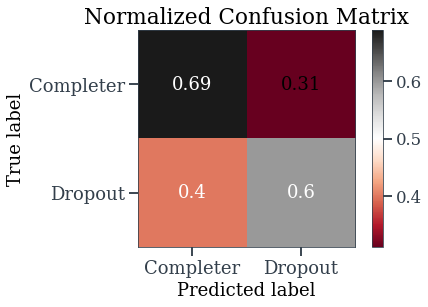

In [81]:
import scikitplot as skplt
y_pred = pipe_rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'RdGy')

In [82]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Completer       0.61      0.69      0.65      1498
     Dropout       0.68      0.60      0.64      1653

    accuracy                           0.64      3151
   macro avg       0.65      0.65      0.64      3151
weighted avg       0.65      0.64      0.64      3151



In [83]:
print("\n")
print("model score: %.3f" % pipe_rf.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score for dropout prediction:",metrics.precision_score(y_test, y_pred, average="binary", pos_label='Dropout'))
print("Recall score for dropout prediction:",metrics.recall_score(y_test, y_pred, average="binary", pos_label='Dropout'))



model score: 0.644
Accuracy: 0.6442399238337035
Precision score for dropout prediction: 0.6829436038514443
Recall score for dropout prediction: 0.6007259528130672


## ROC-Curve and AUC value

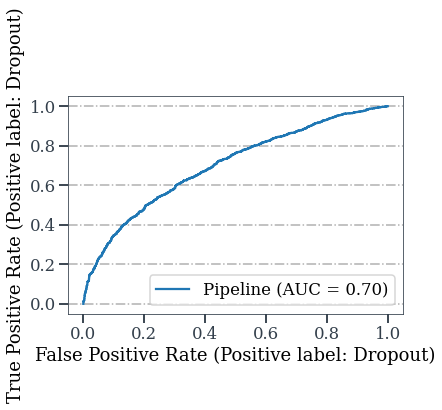

In [84]:
from sklearn.metrics import roc_curve             # test
metrics.plot_roc_curve(pipe_rf, X_test, y_test)  
matplotlib.pyplot.grid(axis = 'y', linestyle='-.')
plt.show()

## Permutation Feature Importance 

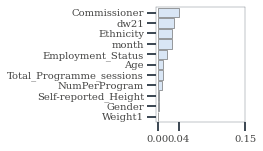

In [85]:
#  https://github.com/parrt/random-forest-importances
from rfpimp import *
imp = importances(pipe_rf, X_test, y_test) # permutation
fig = plot_importances(imp)
fig.view()

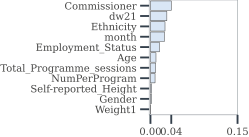

In [86]:
fig

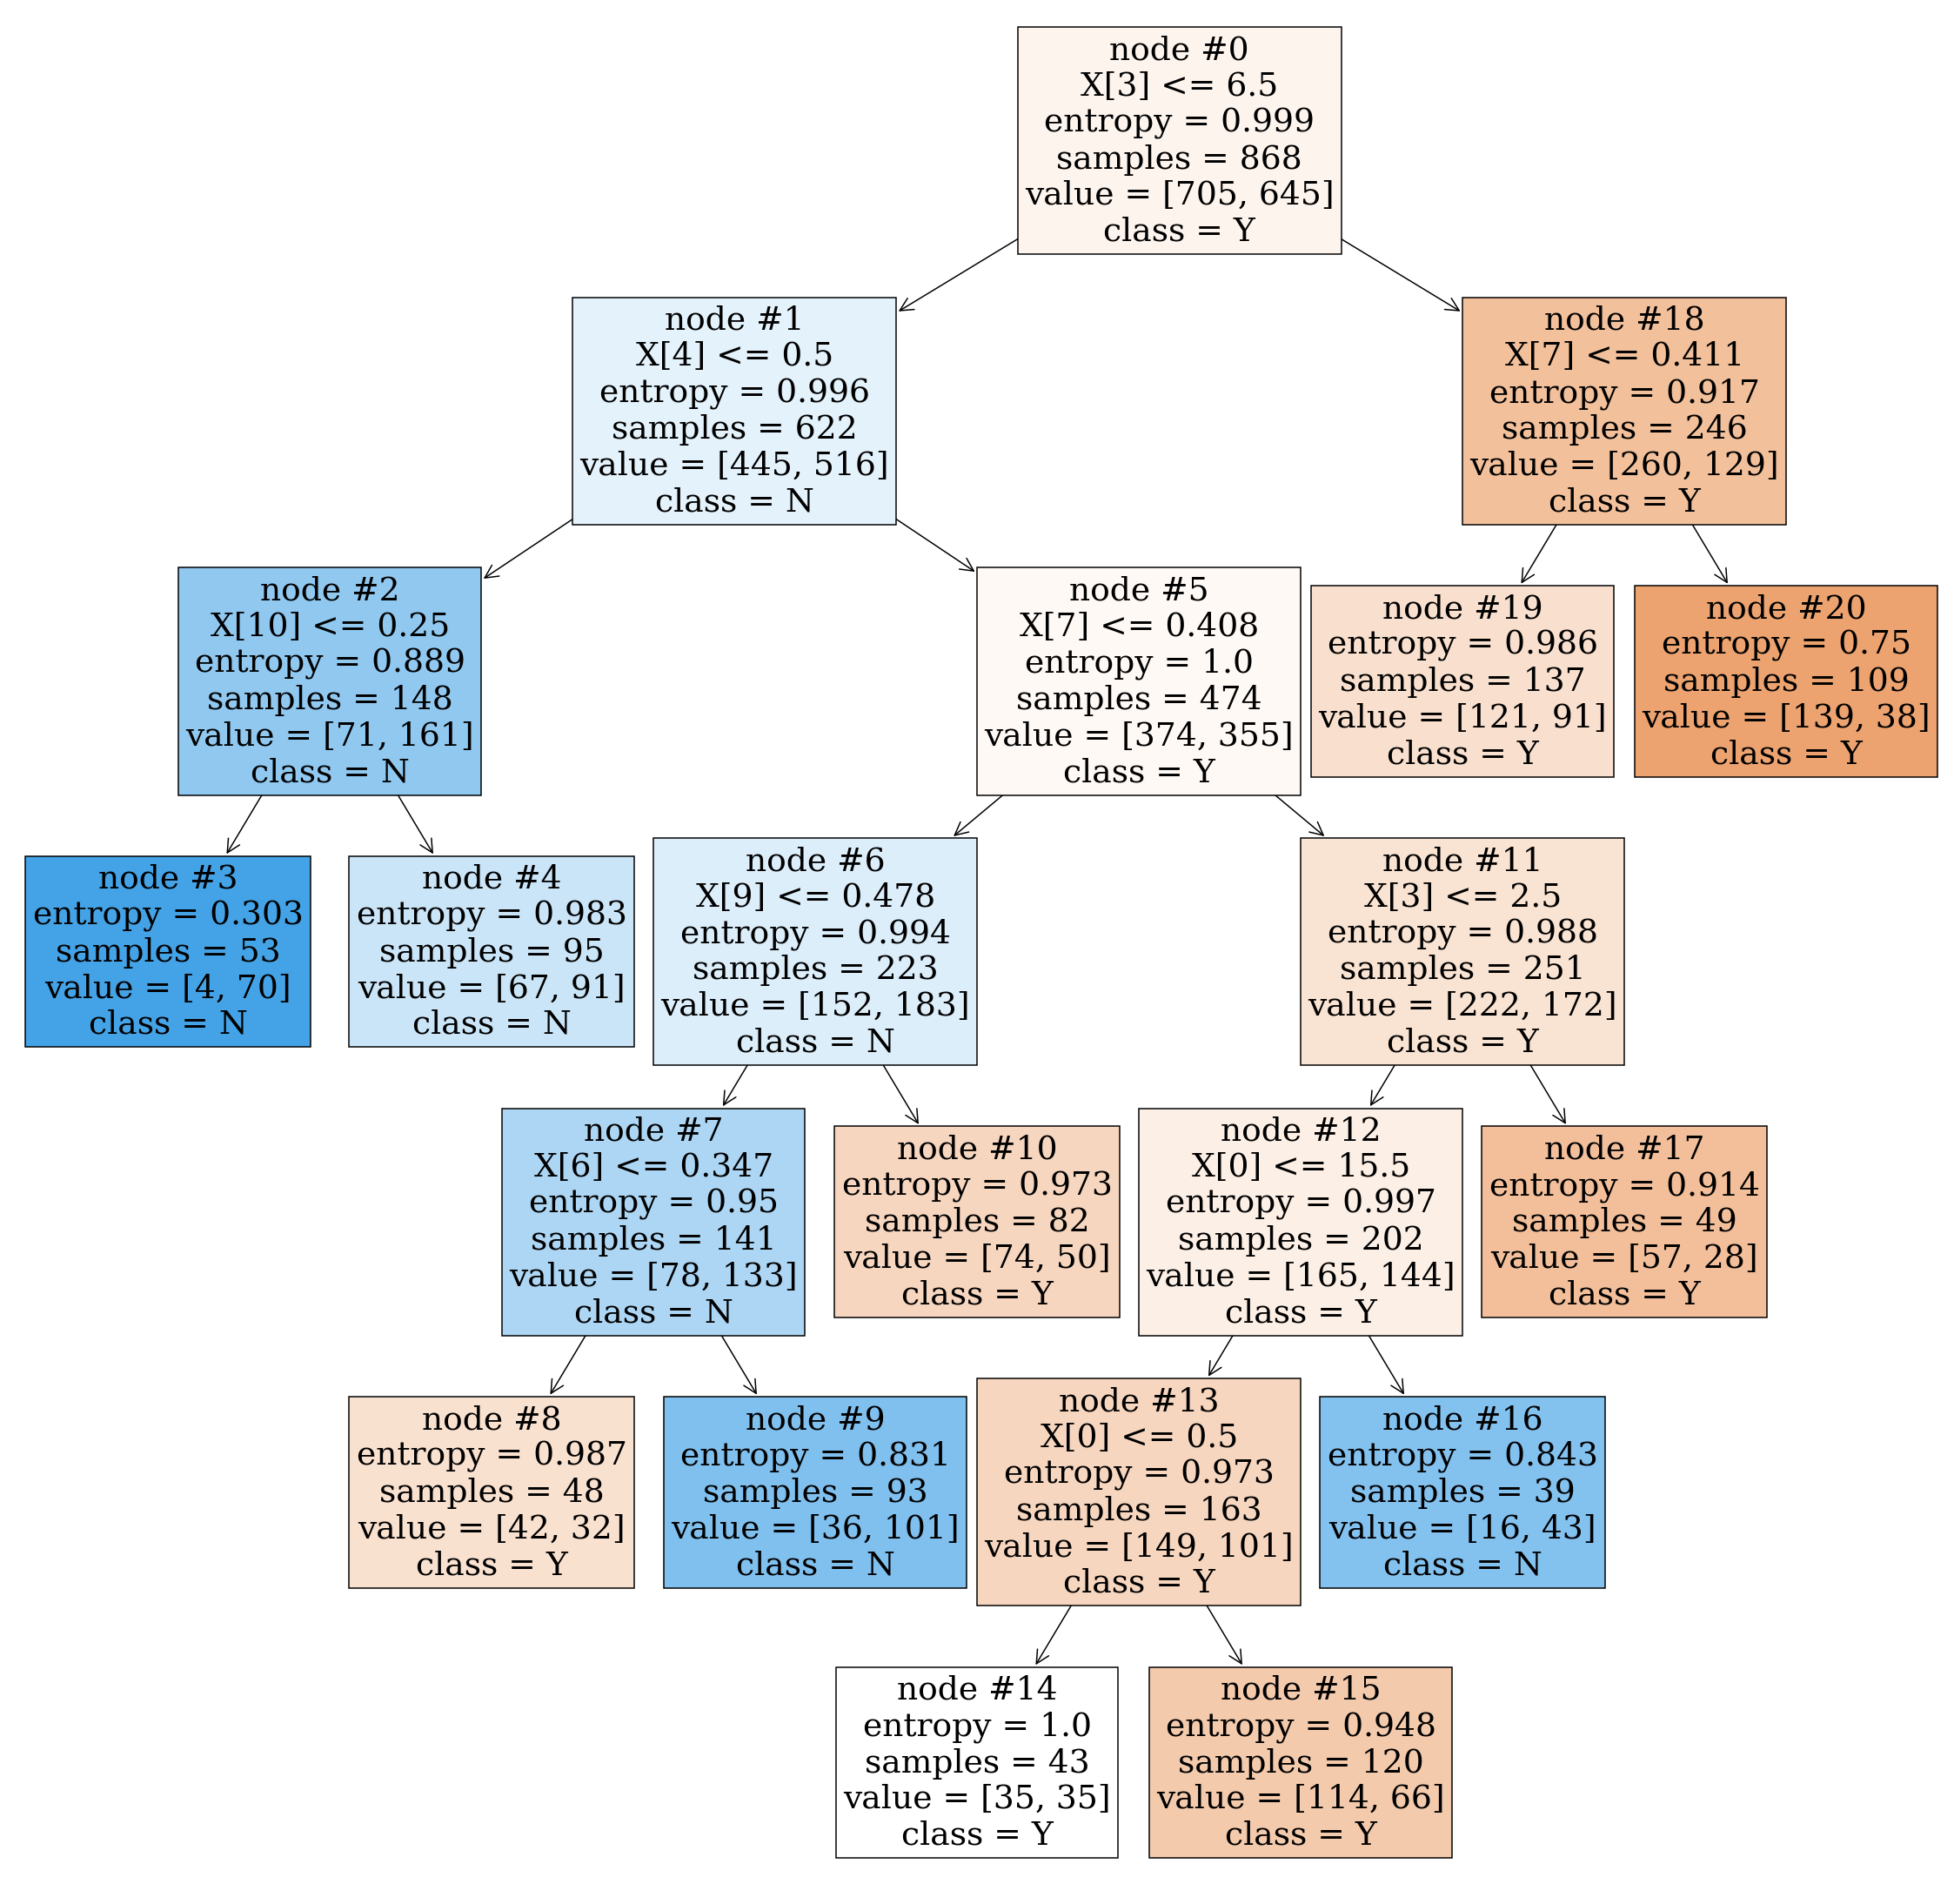

In [87]:
#  https://mlcourse.ai/articles/topic5-part3-feature-importance/
# sample tree in the random forest
from sklearn import tree
tree_list = pipe_rf[1].estimators_
feature_names = X_test.columns.tolist()
plt.figure(figsize=(40, 40))
tree.plot_tree(
    tree_list[1],
    filled=True,
    #feature_names=feature_names,
    class_names=["Y", "N"],
    node_ids=True,
);

## Naive bayes

In [88]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns',df.shape[1]+1)  
columns = ['Commissioner','Weight1','Gender','Age','Ethnicity','Employment_Status','Engagement_status','month','dw21','NumPerProgram','Self-reported_Height','Total_Programme_sessions']

catageorical_variables = ['Commissioner', 'Gender', 'Ethnicity', 'Employment_Status', 'month']
numerical_variables =  ['Age','Weight1','dw21','NumPerProgram','Self-reported_Height','Total_Programme_sessions']

df = df[columns].dropna()
df[catageorical_variables] = df[catageorical_variables].astype(str)    

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df[catageorical_variables]:
    df[column] = le.fit_transform(df[column])

In [90]:
X = df.drop(['Engagement_status'],axis=1).astype(str)  
y = df['Engagement_status']  


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [93]:
score = cross_val_score(classifier, X_train, y_train, cv=cv, n_jobs=1)
score.mean()

0.5986111111111111

In [94]:
y_pred = classifier.predict(X_test)
print("model score or (Accuracy): %.2f" % classifier.score(X_test, y_test))

model score or (Accuracy): 0.61


In [95]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Completer       0.61      0.51      0.55       429
     Dropout       0.61      0.71      0.66       472

    accuracy                           0.61       901
   macro avg       0.61      0.61      0.61       901
weighted avg       0.61      0.61      0.61       901



In [96]:
print("\n")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score for dropout prediction:",metrics.precision_score(y_test, y_pred, average="binary", pos_label='Dropout'))
print("Recall score for dropout prediction:",metrics.recall_score(y_test, y_pred, average="binary", pos_label='Dropout'))



model score: 0.613
Accuracy: 0.6126526082130965
Precision score for dropout prediction: 0.6124314442413162
Recall score for dropout prediction: 0.7097457627118644


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

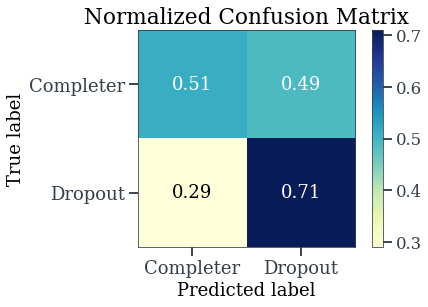

In [97]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'YlGnBu') #binary

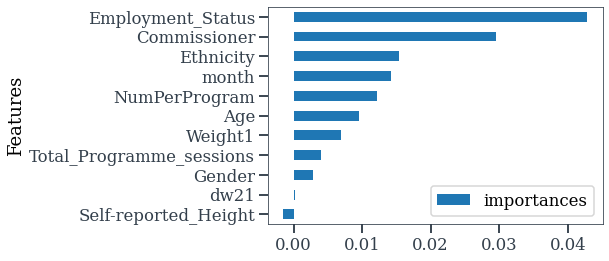

In [98]:
imps = permutation_importance(classifier, X_test, y_test)
newdf = pd.DataFrame({'Features':X.columns})
newdf['importances'] = imps.importances_mean
newdf = newdf.sort_values(by=['importances'])
ax = newdf.plot.barh(x='Features', y='importances')

## ROC-Curve and AUC value

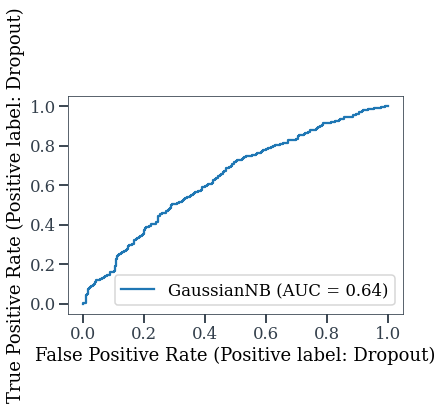

In [99]:
metrics.plot_roc_curve(classifier, X_test, y_test)  
plt.show()

## ANN MLP classifier

In [100]:
df = pd.read_csv('data.csv')  
df =df.drop(axis = 1,columns = 'Unnamed: 0')
columns = ['Commissioner','Weight1','Self-reported_Height','Gender','Age','Ethnicity','Employment_Status','Engagement_status','month','dw21','NumPerProgram','Total_Programme_sessions']
df = df[columns].dropna()


X = df.drop(['Engagement_status'],axis=1).astype(str)     #features
y = df['Engagement_status']                               #label

catageorical_variables = ['Commissioner', 'Gender', 'Ethnicity', 'Employment_Status', 'month']
numerical_variables =  ['Age','Weight1','dw21','NumPerProgram','Self-reported_Height','Total_Programme_sessions']

In [101]:
from sklearn.neural_network import MLPClassifier
transform_cat = OneHotEncoder(handle_unknown='ignore')

preprocess_ann =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
pipe = Pipeline(steps = [('preprocess_ann',preprocess_ann),('ANN',model)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


score = cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=1)
score.mean()

0.6411111111111112

In [102]:
model_ann =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
preprocess_ann =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])

pipe = Pipeline(steps = [('preprocess',preprocess_ann),('ann',model_ann)])

param_grid = {
                'ann__solver'              :   ['lbfgs','sgd','adam'],
                'ann__max_iter'            :   [10000 ],
                'ann__alpha'               :   [0.0001, 100], 
                'ann__hidden_layer_sizes'  :   [5,80],
                'ann__random_state'        :   [0],
                'ann__learning_rate'       :   ['constant', 'invscaling', 'adaptive']
             }
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('catToNum',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Commissioner',
                                                                          'Gender',
                                                                          'Ethnicity',
                                                                          'Employment_Status',
                                                                          'month']),
                                                                        ('scalingNumerical',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Weight1',
                                                                          'dw21',
                                                                          'NumPerProgram',
                                                                          'Self-reporte...
                                       ('ann',
                                        MLPClassifier(alpha=1e-05,
                                                      hidden_layer_sizes=(5, 2),
                                                      max_iter=5000,
                                                      random_state=1,
                                                      solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'ann__alpha': [0.0001, 100],
                         'ann__hidden_layer_sizes': [5, 80],
                         'ann__learning_rate': ['constant', 'invscaling',
                                                'adaptive'],
                         'ann__max_iter': [10000], 'ann__random_state': [0],
                         'ann__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [103]:
print("Accuracy = %0.3f:" % search.best_score_)
print(search.best_params_)

Accuracy = 0.643:
{'ann__alpha': 0.0001, 'ann__hidden_layer_sizes': 5, 'ann__learning_rate': 'constant', 'ann__max_iter': 10000, 'ann__random_state': 0, 'ann__solver': 'adam'}


In [104]:
prm = search.best_params_
solver = prm['ann__solver']
alpha    = prm['ann__alpha']
hidden_layer_sizes    = prm['ann__hidden_layer_sizes']
max_iter = prm['ann__max_iter']
learning_rate =  prm['ann__learning_rate']

In [105]:
model_ann =  MLPClassifier(solver=solver, learning_rate=learning_rate, alpha= alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=max_iter)
preprocess_ann =  ColumnTransformer(transformers =[('catToNum', transform_cat, catageorical_variables),('scalingNumerical', transform_num, numerical_variables)])

pipe = Pipeline(steps = [('preprocess',preprocess_ann),('ann',model_ann)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('catToNum',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Commissioner', 'Gender',
                                                   'Ethnicity',
                                                   'Employment_Status',
                                                   'month']),
                                                 ('scalingNumerical',
                                                  MinMaxScaler(),
                                                  ['Age', 'Weight1', 'dw21',
                                                   'NumPerProgram',
                                                   'Self-reported_Height',
                                                   'Total_Programme_sessions'])])),
                ('ann',
                 MLPClassifier(hidden_layer_sizes=5, max_iter=10000,
                               random_state=1))])

model score or (Accuracy): 0.6204


model score: 0.620
Accuracy: 0.6204217536071032
Precision score for dropout prediction: 0.6525821596244131
Recall score for dropout prediction: 0.5889830508474576


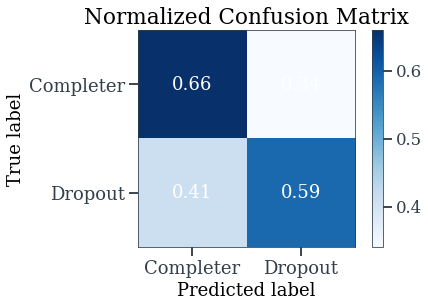

In [106]:
y_pred = pipe.predict(X_test)
print("model score or (Accuracy): %.4f" % pipe.score(X_test, y_test))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
print("\n")
print("model score: %.3f" % pipe.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score for dropout prediction:",metrics.precision_score(y_test, y_pred, average="binary", pos_label='Dropout'))
print("Recall score for dropout prediction:",metrics.recall_score(y_test, y_pred, average="binary", pos_label='Dropout'))

In [107]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Completer       0.59      0.66      0.62       429
     Dropout       0.65      0.59      0.62       472

    accuracy                           0.62       901
   macro avg       0.62      0.62      0.62       901
weighted avg       0.62      0.62      0.62       901



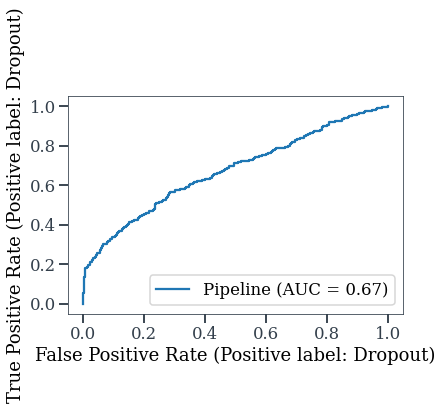

In [108]:
metrics.plot_roc_curve(pipe, X_test, y_test)  
plt.show()

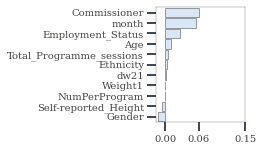

In [109]:
from rfpimp import *
imp = importances(pipe,X_test, y_test)
fig = plot_importances(imp)
fig.view()

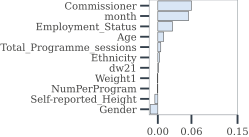

In [110]:
fig

## Survival Analysis
#### (Pratik Shukla, 2020)
https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html

https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html

#### Survival analysis is a collection of methods used for finding the time after which an event of interest occurs. An example of an event and duration could be the death of a cancer patient after treatment and the duration could be the number of days or moths after which the event occured. The period before which an event occurs is called survival and the event is generally called hazard. 

#### survival analysis is usefull to find the duration after which participants could discontinue from the program, the factors that influence the survival probability and survival duration.

#### The dataset definies dropout with a attendance percentage less than a cutoff of 75% but in survival analysis a dropout is an event when a participant is last seen irrespective of his attendance percentage. The survival duration of such participant is the number of weeks between the program start date and the occurence of the dropout event. 

#### There are two quantities of interest the survival probability and the hazard function. Survival probability gives the probability of survival at a time t beyond a given program week and the hazard function is the probability that an event occurs at a time t in its neighbourhood interval dt. The time integral of the hazard function is the cumulative hazard function

#### Kaplan–Meier estimator S(t) is a survival probability function which obeys S(ti) = S(t(i-1))*(1 - (num of dropouts at ti)/(number of survivors before ti)) and S(0) = 1.

In [99]:
df = pd.read_csv('data.csv')   # load new data here and do new data cleaning
df =df.drop(axis = 1,columns = 'Unnamed: 0')

columns = ['ProgrammeName', 'Commissioner', 'week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8', 'week9', 'week10','week11','week12','Engagement_status','AttendedSessions','Total_Programme_sessions','Gender','Age','Ethnicity','Employment_Status','Self-reported_Height','Weight1','month','NumPerProgram','dw21']
df = df[columns]

# Adding new column 'survival_time'
df['survival_time'] = 0    # week after which a participant has discontinued from the program or week last attended
df['status'] = 1           # we have to redefine dropout. for now let all participants dropout, i.e status = 1

In [100]:
# As some programs have more than 12 weeks sessions the survival analysis is done for only 12 weeks part
df['Total_Programme_sessions'].unique()

array([14, 12, 13], dtype=int64)

#### The weekly attedance has three unique values 'Y', 'N', 'nan'. In the dataset the percentage of attendance is calculated by assuming a null value means absence of the attendance or 'N'. For the following analysis it is assumed that a null value of attendance indicates absence

In [101]:
# Replacing missing attendance values with 'N'
weeks = ['week1','week2','week3','week4','week5','week6','week7','week8' ,'week9','week10','week11','week12']
for i, r in df.iterrows():
    for week in df[weeks]:
        if(pd.isna(df.loc[i,week])):
            df.loc[i,week] = 'N'

In [102]:
ReversedWeeks = []
for week in reversed(weeks):
    ReversedWeeks.append(week)

In [103]:
for i, r in df.iterrows():
    survivalTime = 12
    for week in df[ReversedWeeks]:
        if(df.loc[i,week] == 'N' ):
            survivalTime = survivalTime - 1
        else:
            break
    df.loc[i,'survival_time'] = survivalTime 

In [104]:
df[weeks + ['survival_time', 'AttendedSessions', 'status']].head(2)

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,survival_time,AttendedSessions,status
0,Y,N,N,N,N,N,N,N,N,N,N,N,1,1,1
1,Y,N,N,N,N,N,N,N,N,N,N,N,1,1,1


In [105]:
df['status'] = df['status'].astype('bool')
for i,r in df.iterrows():
    if(r['survival_time'] > 11):
        df.loc[i,'status'] = False 

In [106]:
df[weeks + ['survival_time', 'AttendedSessions', 'status']].head()

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,survival_time,AttendedSessions,status
0,Y,N,N,N,N,N,N,N,N,N,N,N,1,1,True
1,Y,N,N,N,N,N,N,N,N,N,N,N,1,1,True
2,Y,Y,Y,N,N,N,Y,Y,N,N,N,N,8,5,True
3,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,11,12,True
4,Y,N,Y,Y,N,Y,Y,Y,Y,N,Y,Y,12,11,False


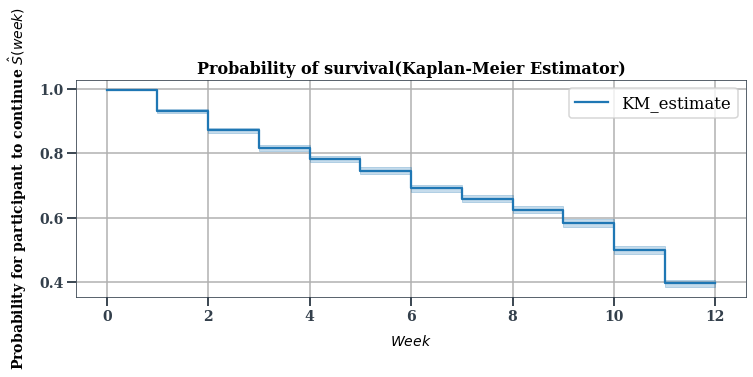

In [107]:
from sksurv.nonparametric import kaplan_meier_estimator
from lifelines import KaplanMeierFitter, NelsonAalenFitter

plt.figure(figsize=(12,4))
kmf = KaplanMeierFitter()
kmf.fit(durations = df["survival_time"],event_observed = df["status"])
kmf.event_table
kmf.survival_function_
kmf.plot()

plt.title("Probability of survival(Kaplan-Meier Estimator)", fontsize=16,weight = 'bold')
plt.ylabel("Probability for participant to continue $\hat{S}(week)$", labelpad=10, fontsize=14, weight = 'bold')
plt.xlabel("$Week$", labelpad=10, fontsize=14, weight = 'bold')
plt.xticks(fontsize=14,weight = 'bold')
plt.yticks(fontsize=14, weight = 'bold')
matplotlib.pyplot.grid(axis = 'both', linestyle='-') 

#### The survival chances drop rapidly in the begining and ending weeks of the program. The drop in survival in between the weeks 3 and 9 is relatively low.

In [108]:
print('The median survival time is =',kmf.median_survival_time_)

The median survival time is = 10.0


In [109]:
# survival functions by group
def kaplanPlot(column):
    plt.figure(figsize=(25,10))
    for val in df[column].unique():
        df2 = df[df[column]==val]
        time, survival_prob = kaplan_meier_estimator(df2["status"], df2["survival_time"])
        plt.step(time, survival_prob, where="post", label="%s" % val)  
        
    c = "survival probability by " + column
    plt.ylabel(c, labelpad=10, fontsize=16, weight = 'bold')
    plt.xlabel("week", labelpad=10, fontsize=16, weight = 'bold')
    plt.xticks(fontsize=14,weight = 'bold')
    plt.yticks(fontsize=14, weight = 'bold')
    matplotlib.pyplot.grid(axis = 'both', linestyle='-')
    plt.legend(loc="best")
    
    c = "Probability of survival(Kaplan-Meier Estimator) by " + column
    plt.title(c, fontsize=17,weight = 'bold')

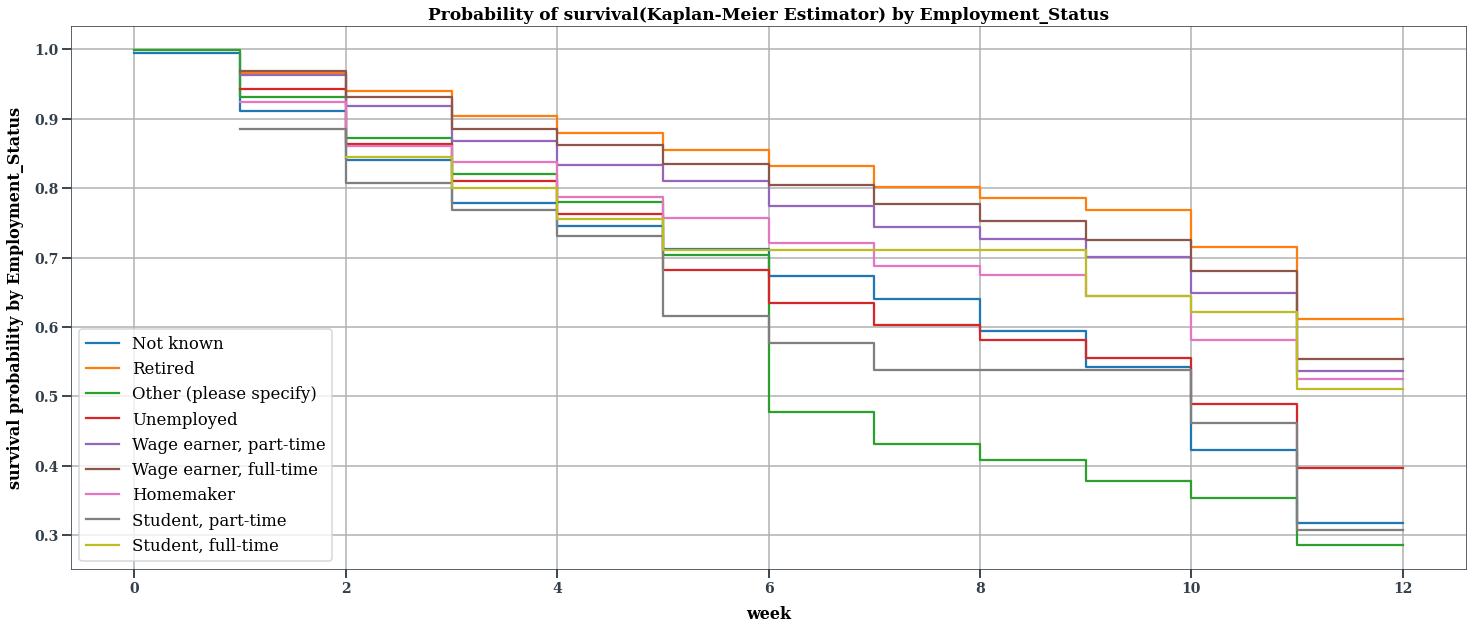

In [110]:
column = 'Employment_Status'
kaplanPlot(column)

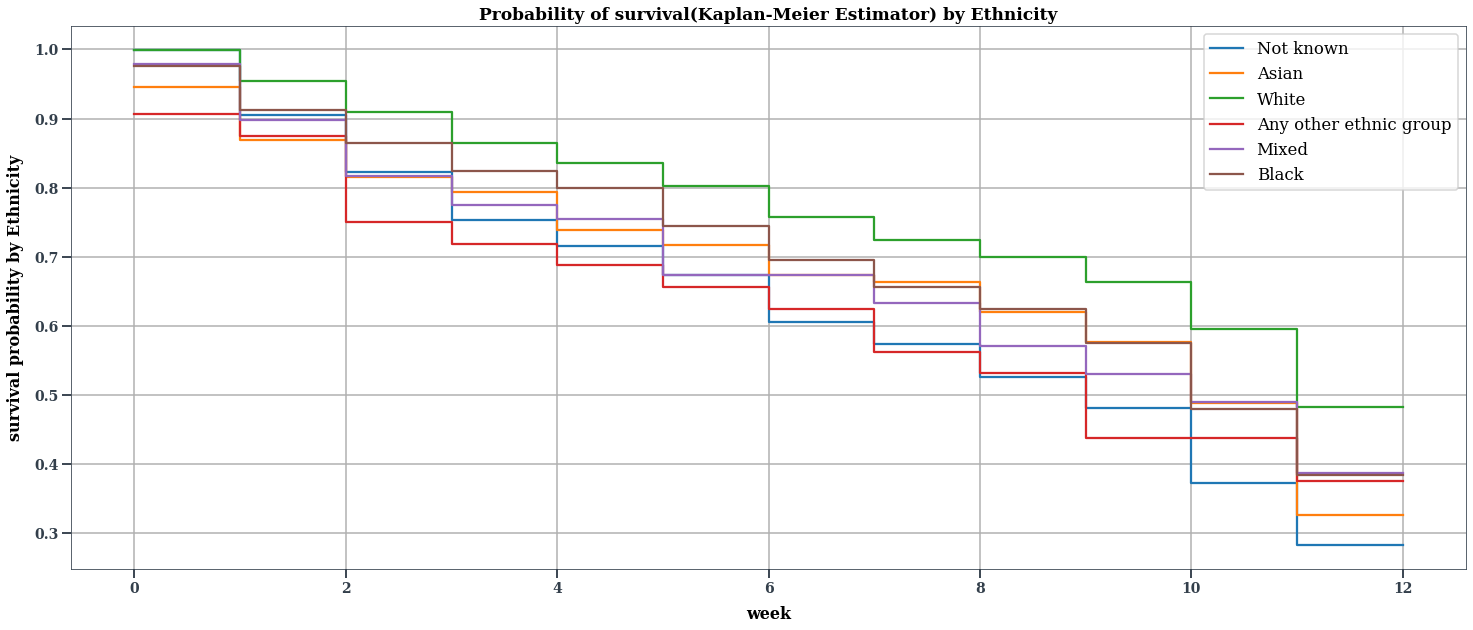

In [111]:
column = 'Ethnicity'
kaplanPlot(column)

In [112]:
#asians have low survival after week 10

#### The survival curves shows that retired, full-time and part-timewage earners, Home-makers and fulltime students have lower reduction in survival compared to unemployed, Part time students ,other employemnt categories and unknown employment status.
#### The drop in survival rates are relatively steady in between week6 to week 10
#### Retired participants have relatively higher survival probability at every  program week this also supports that age has impact as previously seen


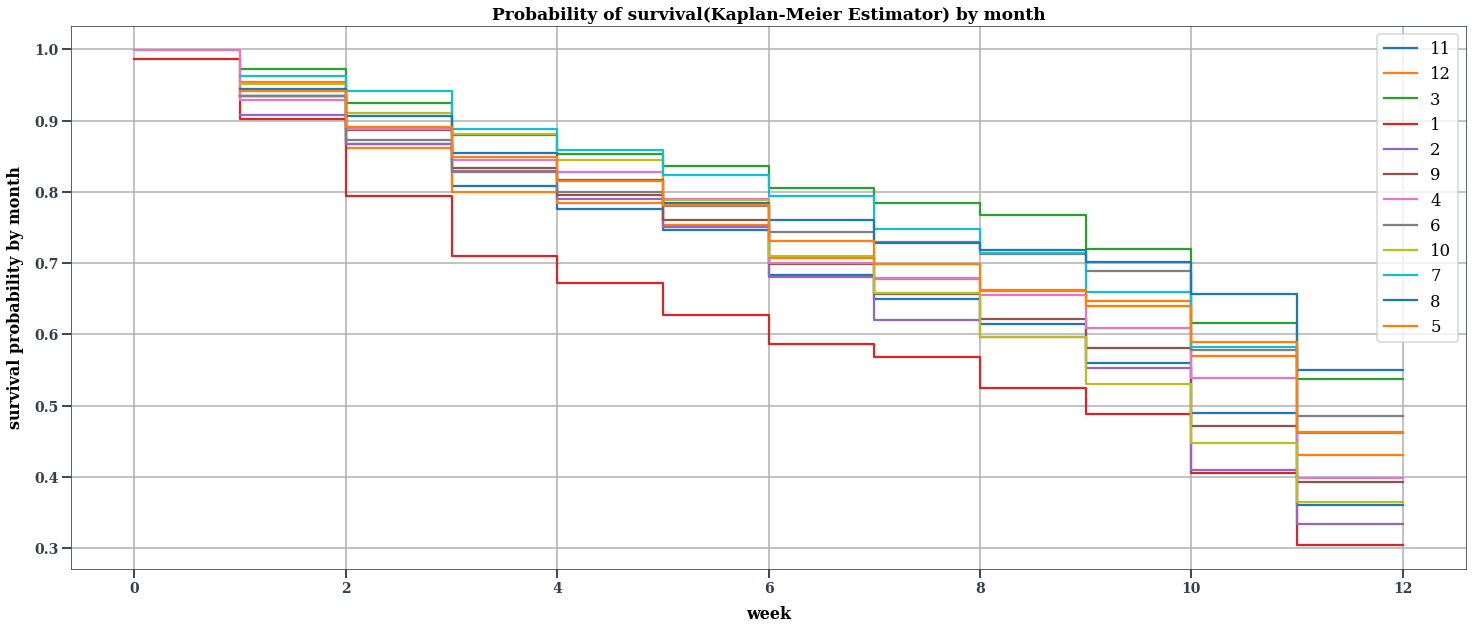

In [113]:
column = 'month'
kaplanPlot(column)

#### Probability of completing(surviving) at every week is low in january and feburary compared to other months

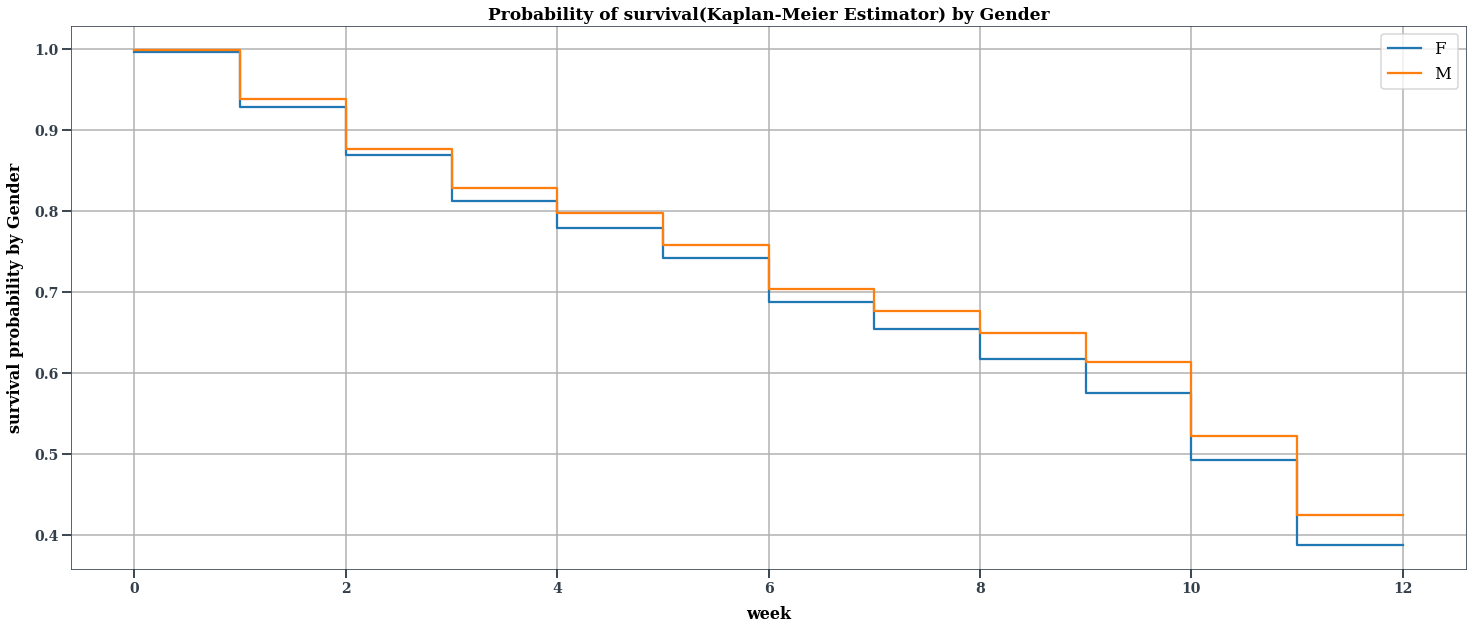

In [114]:
column = 'Gender'
kaplanPlot(column)

##### The female completion chances reduce faster than males during the ending program sessions
#### Is this difference significant?

### Log rank test
#### null hypothesis ---> there is no significant difference between the survival of both gender groups

#### p < 0.05 ==> reject null hypothesis

In [115]:
group1_status = df[df['Gender'] == 'M']['status']
group1_survival_time = df[df['Gender'] == 'M']['survival_time']
group2_status = df[df['Gender'] == 'F']['status']
group2_survival_time = df[df['Gender'] == 'F']['survival_time']

from lifelines.statistics import logrank_test
test = logrank_test(group1_survival_time,group2_survival_time,event_observed_A = group1_survival_time, event_observed_B =group2_survival_time)
test.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.36 0.01      6.42

#### P < 0.05 means there is stastically significant difference in the survival of both the groups

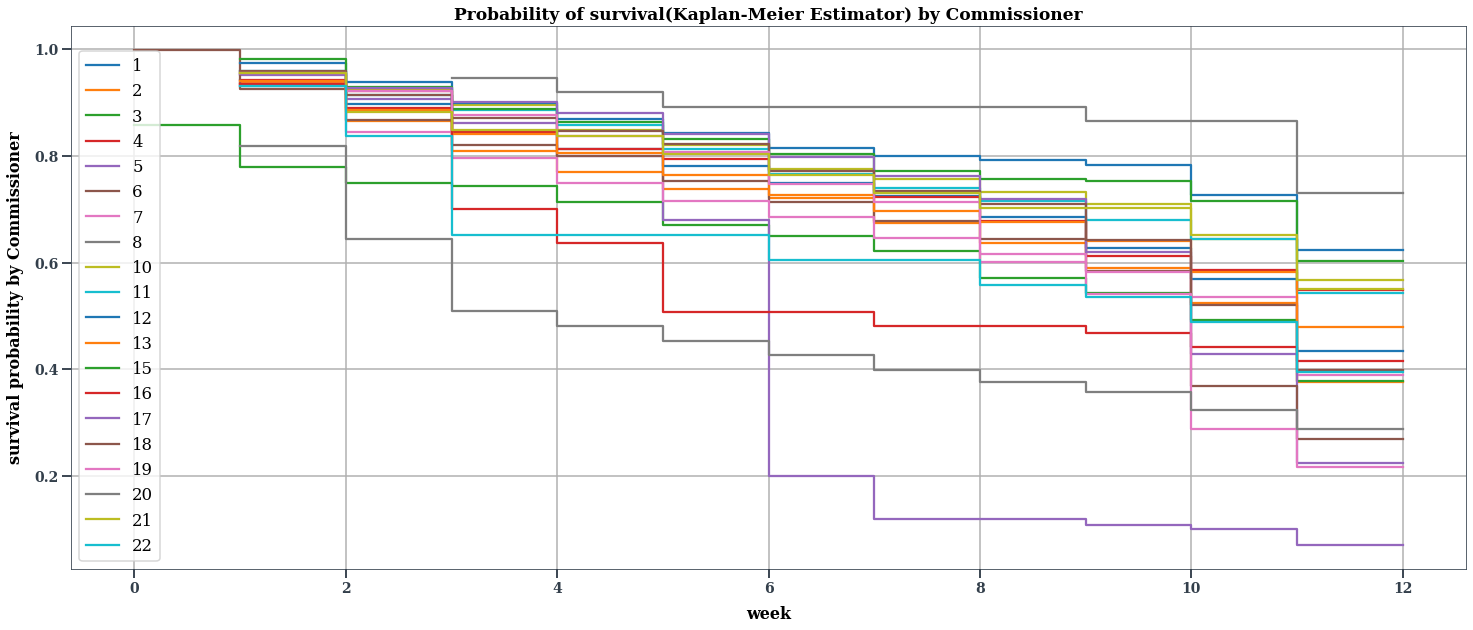

In [116]:
column = 'Commissioner'
kaplanPlot(column)

#### Nelson aalen hazard function describes the dropout rate unlike the kaplan curves that focus on survival probability
#### It can be defined as H(T_i) = SUM(num of dropouts(T_i) / (num of participants(T_i)))
#### T_i is the ith week

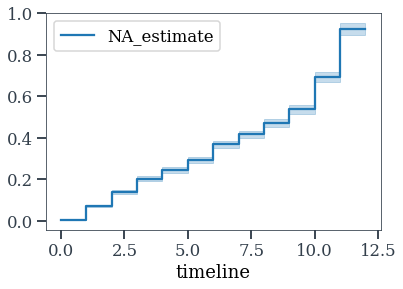

In [117]:
# Hazard Function
nf = NelsonAalenFitter()
nf.fit(durations = df["survival_time"],event_observed = df["status"])
nf.cumulative_hazard_
nf.plot_cumulative_hazard()

##### The kaplan curves take only one variable group. For analysing the hazard function with multiple variables we use COX Proportional hazards model.  This model identifies how different factors like age, commissioneir, employment_status effect participant's survival. COX model also can handle both categorical and numerical variables

#### https://www.youtube.com/watch?v=ZlcIG7TtcI0
#### In proportional hazard model the hazard functin is modeled in terms of a basline hazard function which is independent of the variables like gender, ethnicity etc. The baseline hazard function is multiplied by an exponential of linear sum of the covariates, Covariates are the terms like gender, comissioner, age etc.
#### H(z,t) = H(t)*e^(z) where z = c_1*z_1 + c_2*z_2 + ....
#### e^(c_i) is called the hazard ratio. If it is above one the hazard( drop in survival or dropout) increases and vice-versa is its less than 1.

In [95]:
df2 =df.drop(axis = 1,columns = ['dw21','Self-reported_Height'])

columns =['Commissioner','Gender','Age','Ethnicity','Employment_Status','Weight1','month','NumPerProgram','survival_time','status']
df2 = df2[columns]
df2 = df2.dropna()
#kmf.fit(event_observed = df2["status"], durations = df2["survival_time"])

In [96]:
cat = ['Gender','Ethnicity','Employment_Status','Commissioner','month','NumPerProgram']
df2[cat] = df2[cat].astype('category')

In [97]:
# https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis
num_df2 = OneHotEncoder().fit_transform(df2)

In [98]:
from lifelines import CoxPHFitter
cox = CoxPHFitter()
cox.fit(num_df2,'survival_time',event_col='status')
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 6615 total observations, 2654 right-censored observations>
             duration col = 'survival_time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 6615
number of events observed = 3961
   partial log-likelihood = -32666.02
         time fit was run = 2021-10-05 08:42:36 UTC

---
                                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                        
Commissioner=2                             0.23       1.25       0.08             0.06             0.39                 1.06                 1.48
Commissioner=3                            -0.50       0.60       0.16            -0.81            -0.20                 0.45                 0.82
Commissioner=4                            -0.09       0.91       0.16            -0.40             0.22                 0.67                 1.24
Commissioner=5                             1.19       3.29       0.15             0.90             1.48                 2.47                 4.39
Commissioner=6                             0.21       1.24       0.12            -0.02             0.45                 0.98                 1.57
Commissioner=7                             0.31       1.37       0.12             0.09             0.54                 1.09                 1.72
Commissioner=8                            -0.62       0.54       0.33            -1.27             0.04                 0.28                 1.04
Commissioner=10                           -0.15       0.86       0.12            -0.39             0.09                 0.68                 1.09
Commissioner=11                           -0.19       0.83       0.11            -0.41             0.03                 0.66                 1.03
Commissioner=12                           -0.31       0.73       0.13            -0.57            -0.06                 0.56                 0.94
Commissioner=13                            0.13       1.14       0.13            -0.12             0.38                 0.89                 1.47
Commissioner=15                           -0.23       0.79       0.15            -0.53             0.06                 0.59                 1.06
Commissioner=16                            0.62       1.86       0.18             0.26             0.98                 1.30                 2.66
Commissioner=17                            0.30       1.35       0.09             0.12             0.48                 1.13                 1.62
Commissioner=18                            0.22       1.25       0.11             0.01             0.43                 1.01                 1.54
Commissioner=19                            0.28       1.33       0.09             0.10             0.47                 1.10                 1.60
Commissioner=20                            0.90       2.45       0.08             0.74             1.06                 2.09                 2.89
Commissioner=21                           -0.09       0.92       0.15            -0.38             0.21                 0.68                 1.23
Commissioner=22                            0.63       1.89       0.22             0.19             1.07                 1.21                 2.93
Gender=M                                  -0.05       0.95       0.04            -0.13             0.04                 0.88                 1.04
Age                                       -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
Ethnicity=Asian                           -0.09       0.91       0.26            -0.60             0.41                 0.55                 1.51
Ethnicity=Black                           -0.26       0.77       0.26            -0.76             0.24                 0.4

In [124]:
# from matplotlib.pyplot import figure
# figure(figsize=(14, 18), dpi=80)

# cox.plot()

#### For unemployed category p<0.005 which means unemployement is strongly related to dropout. Being unemployed increases the hazard by a factor of 1.41
#### For parttime students p < 0.005 and being part time student increases the hazard by a factor 1.75
#### The hazard ratio is high for programs with higher participant sizes. The hazard ratios are relatively small for programs below size 21
#### Program months of june, july, august, september reduces the hazard risk by a factor of 0.47, 0.66, 0.53, 0.57 respectively

#### commisionary 20 and 5 increase the hazard risk while commisionary 3 reduces the hazard by a factor of 0.61

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 6615 total observations, 2654 right-censored observations>
         test_name = proportional_hazard_test

---
                                               test_statistic      p  -log2(p)
Age                                      km             11.09 <0.005     10.17
                                         rank           10.82 <0.005      9.96
Commissioner=10                          km              0.43   0.51      0.96
                                         rank            0.17   0.68      0.56
Commissioner=11                          km              0.70   0.40      1.31
                                         rank            0.30   0.59      0.77
Commissioner=12                          km              0.06   0.80      0.31
                                         rank            1.02   0.31      1.68
Commissioner=13                          km              2.65   0.10      3.28
                                         rank            0.03   0.87      0.20
Commissioner=15                          km              2.32   0.13      2.97
                                         rank            0.02   0.88      0.18
Commissioner=16                          km             12.97 <0.005     11.63
                                         rank            5.31   0.02      5.56
Commissioner=17                          km             91.82 <0.005     69.83
                                         rank          143.72 <0.005    107.59
Commissioner=18                          km             28.33 <0.005     23.22
                                         rank           58.31 <0.005     45.35
Commissioner=19                          km             30.11 <0.005     24.55
                                         rank           77.74 <0.005     59.56
Commissioner=2                           km              0.14   0.71      0.49
                                         rank            0.58   0.45      1.17
Commissioner=20                          km             66.45 <0.005     51.30
                                         rank           20.40 <0.005     17.28
Commissioner=21                          km              4.83   0.03      5.16
                                         rank            0.01   0.92      0.13
Commissioner=22                          km              3.12   0.08      3.69
                                         rank            0.03   0.87      0.21
Commissioner=3                           km              2.93   0.09      3.53
                                         rank            4.01   0.05      4.47
Commissioner=4                           km             12.35 <0.005     11.14
                                         rank            8.45 <0.005      8.10
Commissioner=5                           km             10.98 <0.005     10.09
                                         rank           17.24 <0.005     14.89
Commissioner=6                           km              0.15   0.70      0.51
                                         rank            0.11   0.74      0.44
Commissioner=7                           km              1.86   0.17      2.54
                                         rank            0.20   0.65      0.61
Commissioner=8                           km              0.19   0.66      0.60
                                         rank            0.69   0.41      1.30
Employment_Status=Not known              km              1.26   0.26      1.94
                                         rank            1.56   0.21      2.24
Employment_Status=Other (please specify) km              0.24   0.62      0.68
                                         rank            0.37   0.54      0.88
Employment_Status=Retired                km              3.71   0.05      4.21
                                         rank            3.91   0.05      4.38
Employme



1. Variable 'Commissioner=3' failed the non-proportional test: p-value is 0.0452.

   Advice: with so few unique values (only 2), you can include `strata=['Commissioner=3', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Commissioner=4' failed the non-proportional test: p-value is 0.0004.

   Advice: with so few unique values (only 2), you can include `strata=['Commissioner=4', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'Commissioner=5' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['Commissioner=5', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'Commissioner=16' failed the non-proportional test: p-value is 0.0003.

   Advice: with so few unique va

D:\drive\installations\lib\site-packages\lifelines\fitters\mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



22. Variable 'NumPerProgram=23' failed the non-proportional test: p-value is 0.0110.

   Advice: with so few unique values (only 2), you can include `strata=['NumPerProgram=23', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



D:\drive\installations\lib\site-packages\lifelines\fitters\mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



23. Variable 'NumPerProgram=34' failed the non-proportional test: p-value is 0.0520.

   Advice: with so few unique values (only 2), you can include `strata=['NumPerProgram=34', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



D:\drive\installations\lib\site-packages\lifelines\fitters\mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



24. Variable 'NumPerProgram=35' failed the non-proportional test: p-value is 0.0005.

   Advice: with so few unique values (only 2), you can include `strata=['NumPerProgram=35', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



D:\drive\installations\lib\site-packages\lifelines\fitters\mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



25. Variable 'NumPerProgram=37' failed the non-proportional test: p-value is 0.0008.

   Advice: with so few unique values (only 2), you can include `strata=['NumPerProgram=37', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



D:\drive\installations\lib\site-packages\lifelines\fitters\mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<matplotlib.axes._subplots.AxesSubplot at 0x1ec52f53610>,

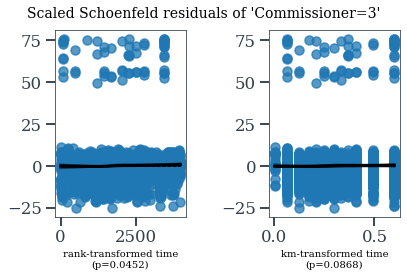

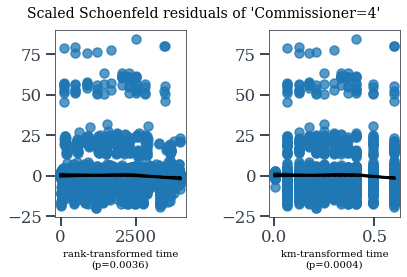

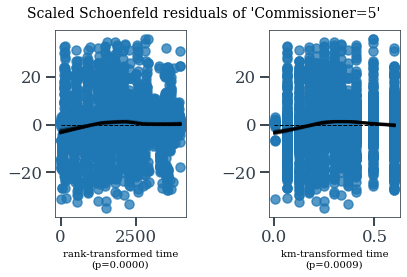

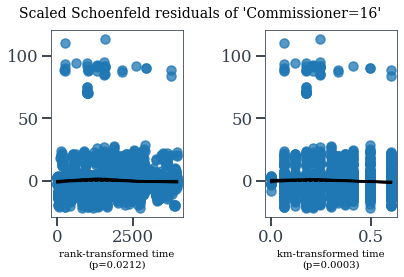

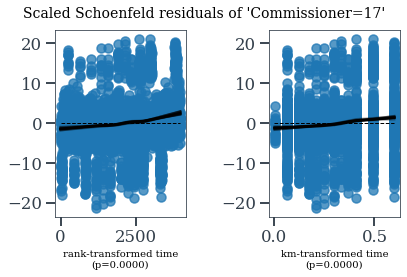

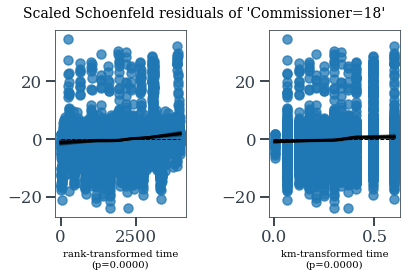

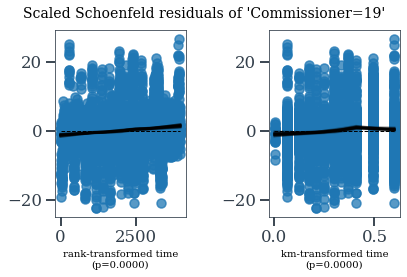

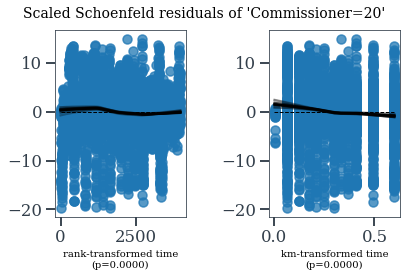

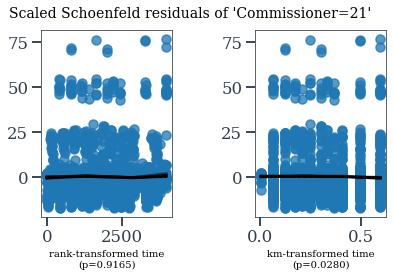

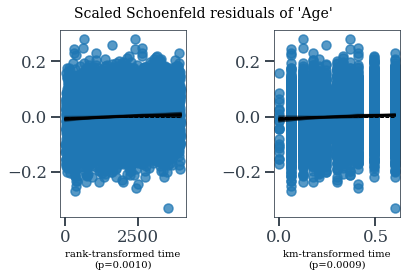

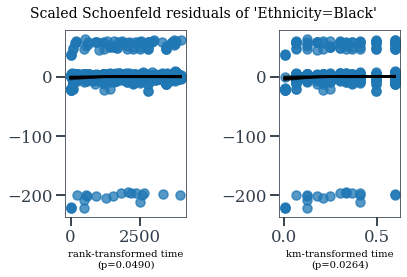

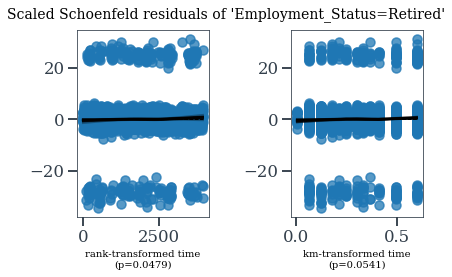

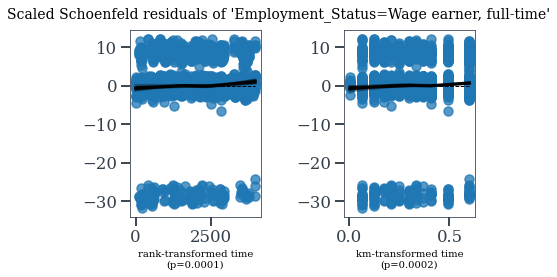

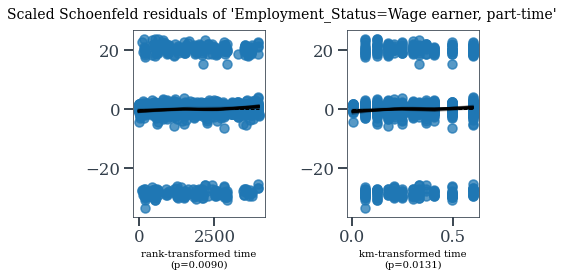

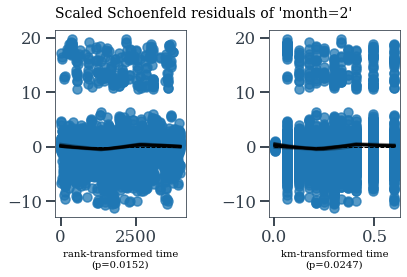

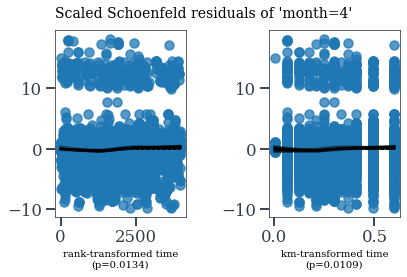

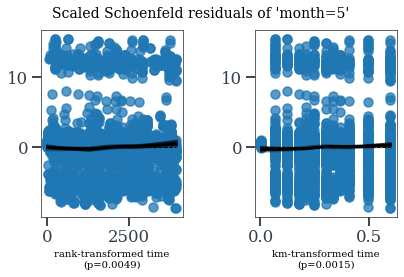

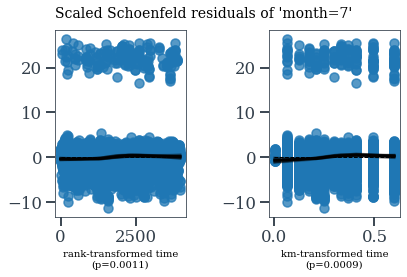

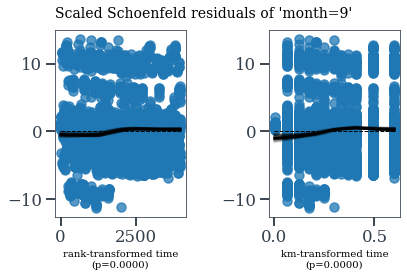

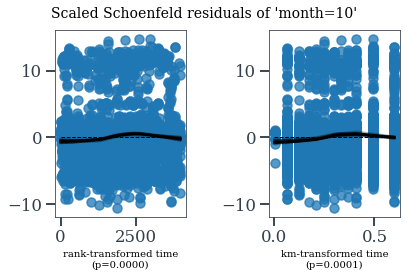

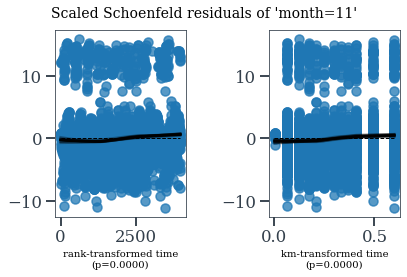

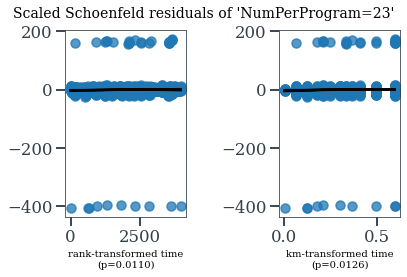

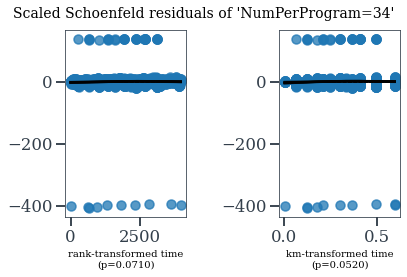

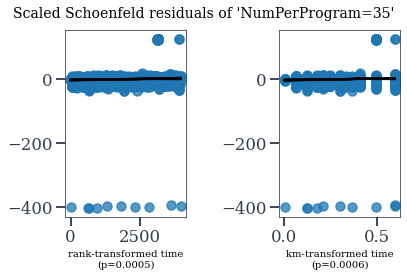

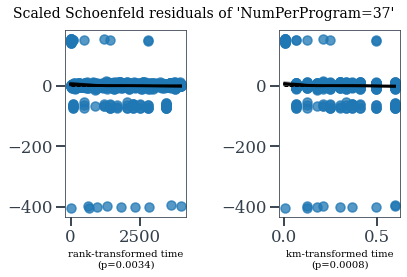

In [127]:
cox.check_assumptions(num_df2, p_value_threshold=0.05, show_plots=True)